# Contents

* [Setting Up the Notebook](#setup)
 * [Library Imports](#library)
 * [Creating Example Data](#data_creation)
* [Distributions and Probabilities](#distributions_and_probabilities)
 * [Distributions and Probabilties Code References](#distribution_code)
 * [Normal Distribution Examples](#normal_examples)
* [A Note on CLT](#CLT_note)
* [Parametric Tests](#parametric)
 * [Z & General Methodology](#z)
   * [Z-score](#zscore)
   * [One Sample](#z_one_samp)
   * [Two Sampls by p-value](#z_two_samp_p)
   * [Two Samples by Critical Value](#z_two_samp_crit)
 * [T-test](#t)
   * [T-statistic](#tstat)
   * [One Sample Test](#t_one_samp_ttest)
   * [One Sample Confidence Interval](#t_one_samp_confint)
   * [Two Paired Samples](#t_two_dep_samples)
   * [Two Independent Samples](#t_two_ind_samples)
   * [Welch's T-test (Independent Samples, Unequal Variance)](#welch)
 * [ANOVA (and a note on family-wise error)](#ANOVA)
   * [Conceptual Background and F-statistic](#ANOVA)
   * [One-Way ANOVA](#one_way_anova)
   * [n-Way ANOVA and ANCOVA](#n_anova_ancova)
   * [MANOVA](#MANOVA)
* [Nonparametric Tests](#nonparametric)
 * [Normality Testing](#normality_testing)
   * [Skewness](#skewness)
   * [Kurtosis](#kurtosis)
   * [Statistical Tests of Normality](#statistical_tests_normality)
   * [Graphical Tests of Normality](#graphical_tests_normality)
 * [Resampling](#resampling)
   * [Bootstrapping (With Replacement)](#bootstrapping)
     * [Bootstrap Confidence Intervals](#bootstrap_confidence_intervals)
     * [Bootstrap Hypothesis Testing/P-Values](#bootstrap_hypothesis_test)
   * [Permutations (Without Replacement)](#permutation_resampling)
  * [Wilcoxon Rank Sum (Mann-Whitney-U)](#MWW)
  * [Wilcoxon Signed Rank](#wilcoxon_signed_rank)
  * [Kruskal-Wallis](#kruskal_wallis)
* [Categorical Analysis](#Categorical)
 * [Fisher's Exact Test](#fishers)
 * [Chi-Square "Goodness of Fit" Test](#chi_square_fit)
 * [Chi-Square Independence/Homogeneity Test](#chi_square_multvar)
 * [Risks and Odds Ratios](#risk_odds_ratios)
* [Principal Component Analysis](#PCA)
* [Regression](#regression)
 * [Data Setup](#regression_setup)
 * [Python Regression Options](#regression_python)
 * [Ordinary Linear Regression](#ols)
 * [Multiple Linear Regression](#multiple_regression)
 * [Categorical Regression](#categorical_regression)
 * [Regression Diagnostics](#regression_diagnostics)
   * [Linearity Assumption](#regression_linear)
   * [Independence Assumption](#regression_independence)
   * [Normality Assumption](#regression_normality)
   * [Homoscedasticity Assumption](#regression_variance)
   * [Collinearity](#regression_multicollinearity)
   * [Quality](#regression_quality)
   * [Outliers](#regression_outliers)
   * [Addressing Issues](#regression_addressing_issues)
 * [Logistic Regression](#logistic_regression)
   * [Logistic Regression Example and Interpretation](#logistic_example)
   * [Diagnostics](#logistic_diagnostics)
     * [Multiple Variables and Significance](#log_mult_variables)
     * [Linearity Assumption / LOESS](#log_linearity_LOESS)
     * [Goodness of Fit](#log_goodness_of_fit)
     * [Confusion Matrices](#log_confusion_matrices)
     * [ROC, AUC, and Cut Points](#log_roc_auc_cut)

# Setting Up the Notebook <a name="setup"></a>

## Library Imports <a name="library"></a>

In [0]:
# Numpy and Pandas imported for typical data analytics work
import numpy as np
import pandas as pd
# Matplotlib and Seaborn imported for data visualization
import matplotlib.pyplot as plt
# Magic keywords to make matplotlib graphs show correctly in the notebook
%matplotlib inline
import seaborn as sns
# Setting visualization styles to seaborn's generally nicer defaults
sns.set()
# A handy scaler for standardizing data (will be used later)
from sklearn.preprocessing import StandardScaler
# The main function used in Principal Component Analysis
from sklearn.decomposition import PCA
# ROC curve and area under the curve functions useful for classification diagnostics
from sklearn.metrics import roc_curve, roc_auc_score
# Statistics libraries imported
# SciPy is useful for distributions and many statistical tests
import scipy.stats as stats
# A convenience function imported for use in logistic regression discussion
from scipy.special import logit
# And statsmodels is handy for regression and some R-like statistical test versions
import statsmodels.api as sm
# However LOWESS is not in the api module, so we import directly
# LOWESS will be used in logistic regression diagnostics
from statsmodels.nonparametric.smoothers_lowess import lowess

## Creating Example Data <a name="data_creation"></a>

### General Scenario

Let's create some "fake" data to utilize in the below examples. The data created here will be utilized throughout the rest of this notebook unless an example notes otherwise, but in certain cases we may pretend we only have access to or interest in part of the data.

In this case, let's say we're interested in the ages of some particular group.

We'll create two sets of data (that of the sample, and that of the population), and also two subsets of each (A and B). We're creating two subsets as some stastical tests might be interested in multiple samples.

**Remember:  We may not use all (or any) of this data in any one particular example, and we may even pretend it doesn't exist. We're just establishing some reference sets to use at-will later on.**

### Methodology

Since ages in years are generally viewed as discrete (i.e. 25 years old instead of 25.234 years old), we'll create our dataset accordingly. A quick way to do this is using the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html). While this is typically used for the number of events occuring during an interval range, it is a discrete distribution and can be handy here.

The `scipy.stats` library has a handy function `poisson.rvs()` for this where the `rvs` method lets us generate random variable output based on the preceding distribution.

We pick some arbitrary values for the sample (decent-sized sample with relatively lower age set) and population (larger of course, and with a relatively higher age set). We pick the `mu` values for the ages in such that the sample doesn't appear indicative of the population with noticeably lower age values.

Remember that we make two subsets for the Sample and Population. We combine those subsets together to create an overally array for each.




In [0]:
# Sample data creation
# Creating the subsets
Sample_Ages_A = stats.poisson(mu=24).rvs(size=50, random_state=69)
Sample_Ages_B = stats.poisson(mu=29).rvs(size=20, random_state=69)
# And joining them together to create the overall
Sample_Ages = np.concatenate((Sample_Ages_A, Sample_Ages_B))

# Population data creation
# Creating the subsets
Population_Ages_A = stats.poisson(mu=25).rvs(size=1000, random_state=69)
Population_Ages_B = stats.poisson(mu=37).rvs(size=3500, random_state=69)
# And joining them together to create the overall
Population_Ages = np.concatenate((Population_Ages_A, Population_Ages_B))

### Visualization

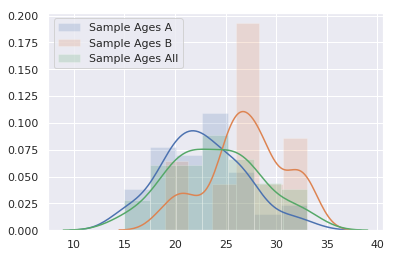

In [272]:
# Distribution overlay of each of the sample sets
sns.distplot(Sample_Ages_A, label="Sample Ages A", hist_kws={"alpha":0.2})
sns.distplot(Sample_Ages_B, label="Sample Ages B", hist_kws={"alpha":0.2})
sns.distplot(Sample_Ages, label="Sample Ages All", hist_kws={"alpha":0.2})
plt.legend()
plt.show()

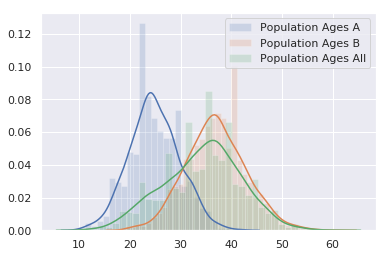

In [273]:
# Distribution overlay of each of the population sets
sns.distplot(Population_Ages_A, label="Population Ages A", hist_kws={"alpha":0.2})
sns.distplot(Population_Ages_B, label="Population Ages B", hist_kws={"alpha":0.2})
sns.distplot(Population_Ages, label="Population Ages All", hist_kws={"alpha":0.2})
plt.legend()
plt.show()

### Convenience Variables

Let's establish some convenience variables that house the means and standard deviations of each data grouping below in case we want to call them later in this notebook.

We'll also create a Pandas dataframe of these variables just to have an easy look at the characteristic values of our data here.

In [274]:
# Defining the means

Sample_Mean_A = Sample_Ages_A.mean()
Sample_Mean_B = Sample_Ages_B.mean()
Sample_Mean = Sample_Ages.mean()

Population_Mean_A = Population_Ages_A.mean()
Population_Mean_B = Population_Ages_B.mean()
Population_Mean = Population_Ages.mean()

# Defining the standard deviations

Sample_Stdv_A = Sample_Ages_A.std()
Sample_Stdv_B = Sample_Ages_B.std()
Sample_Stdv = Sample_Ages.std()

Population_Stdv_A = Population_Ages_A.std()
Population_Stdv_B = Population_Ages_B.std()
Population_Stdv = Population_Ages.std()

# And finally creating a pandas dataframe to make it easy to view all of these variables

# First we build a dictionary set to create the dataframe by
df_dict = {'Group':["Sample Subset A", "Sample Subset B", "Overall Sample",
                    "Population Subset A", "Population Subset B", "Overall Population"],
           'Mean':[Sample_Mean_A, Sample_Mean_B, Sample_Mean,
                   Population_Mean_A, Population_Mean_B, Population_Mean],
           'Std':[Sample_Stdv_A, Sample_Stdv_B, Sample_Stdv,
                  Population_Stdv_A, Population_Stdv_B, Population_Stdv]}

# Then convert that to a dataframe and view it
df = pd.DataFrame(df_dict)
df

,Group,Mean,Std
0,Sample Subset A,22.720000,4.044947
1,Sample Subset B,27.050000,3.827205
2,Overall Sample,23.957143,4.438261
3,Population Subset A,24.850000,4.947878
4,Population Subset B,36.933143,5.974765
5,Overall Population,34.248000,7.644624


# Distributions & Probabilities <a name="distributions_and_probabilities"></a>

Statistical tests are often based on examining probabilities across varrying named distributions. This section will cover the general methodology of finding probabilities in a distribution as well as listing, for reference, the code used for different distribution types.

## Distribution Code References <a name="distribution_code"></a>

Below are some code snippets that might come up frequently during code for various distribution work, here written as a cheat-sheet for the sections below:

* Anything beginning with `stats` is calling from the **SciPy** library where most of the relevant code comes from
 * General form is `stats.somedistribution.somemethod()`. Some of the common methods:
   * `.rvs()` - outputs random variable data-- only one unless a size is given
   * `.cdf()` - returns probabilities for the cumulative density function, that is p(X<=x)
   * `.ppf()` - inverse of the cdf function-- takes in a probability percentage point and returns a value for which the given percentage of the distribution is less than that value
   * `.sf()` - returns probabilites for the survival function, that is p(X>=x) or 1 - the cdf probability
   * `.isf()` - inverse of the sf function and similar to ppf-- takes in a probability percentage point and returns a value for which the given percentage of the distribution is greater than that value
   * `.pdf()` - ouptuts value of the probability density function for a continuous distribution at a given x. Note that this is NOT the probability, as that would be 0 at a specific point on a continuous distribution. Rather it is just the probability. You would have to integrate and find the area under the curve for a particular region. OR you could just use functions like cdf and sf above.
  * Can also be written as `stats.somedistribution(parameters).method(parameter)`. I.e. you can give the mean and standard deviation in the distribution parameters rather than having to define it in the following method (if one were used).
  * Parameters typically include:
   * `loc` for the mean
   * `scale` for the standard deviation
   * `size` for the size of the sample to be generation (i.e. in `.rvs()`)
* For calculating standard errors, Scipy has a handy `sem()` function, where the input is your array. In the current library import, that's `stats.sem()`.

## Normal Distribution Examples <a name="normal_examples"></a>

Before we get started trying specific tests against our data, let's just see what it would look like to check probabilites against the normal distribution.

Let's pretend our population distribution is perfectly normal when we look at the ages on a continuous distribution. Let's say it's population mean is...

In [275]:
Population_Mean

34.248

and population standard deviation is...

In [276]:
Population_Stdv

7.6446238480240325

But pretend this is all the information we have. We don't have access to the full population dataset (so we can't calculate probabilities directly), but we know the mean and standard deviation are roughly these numbers. We also know the distribution of the data is pretty darn normal. While this situation isn't necessarily likely in the real world, we can use it to demonstrate caclulations off of the normal distribution.

For instance, we can find:

* **The probability that the age of a randomly selected individual less than or equal to 37, so p(X<=37):**

In [277]:
# We can use the cumulative density function (cdf)
# This tells us the probability of p(X<=x)
stats.norm.cdf(x=37, loc=Population_Mean, scale=Population_Stdv)

0.6405732742448905

In [278]:
# Equivalently (and true for most other functions here) we could write the same parameter as
stats.norm(loc=Population_Mean, scale=Population_Stdv).cdf(37)

0.6405732742448905

* **The probability that the age of a randomly selected individual greater than or equal to 37, so p(X>=37):**

In [279]:
# We can use the survival function (sf) which is similar to 1 - the cdf
stats.norm.sf(x=37, loc=Population_Mean, scale=Population_Stdv)

0.3594267257551095

In [280]:
# Or we could just 1 - cdf directly
1 - stats.norm.cdf(x=37, loc=Population_Mean, scale=Population_Stdv)

0.3594267257551095

 * **The probability that the age of a randomly selected individual is greather than 5 AND less than 25, so p(5<=X<=25):**

In [281]:
# This is an area between two points so we need to subtract
# You can think of it as subtracting out sections with values less than and use the cdf
stats.norm.cdf(25, loc=Population_Mean, scale=Population_Stdv) - stats.norm.cdf(5, loc=Population_Mean, scale=Population_Stdv)

0.11312438745494655

In [282]:
# Or think of it as subtracting out sections with values greater than and use sf by flipping it
stats.norm.sf(5, loc=Population_Mean, scale=Population_Stdv) - stats.norm.sf(25, loc=Population_Mean, scale=Population_Stdv)

0.11312438745494657

 * **The probability that the age of a randomly selected individual is less than 5 OR greater than 25, so p(X<=5 or X>=25):**

In [283]:
# We have an or statement here, so we need to add two probabilities
stats.norm.cdf(5, loc=Population_Mean, scale=Population_Stdv) + stats.norm.sf(25, loc=Population_Mean, scale=Population_Stdv)

0.8868756125450534

* **The age which approximately 95% of the population is less than:**

In [284]:
# This time we use the percent point function (ppf).
# This acts as the inverse of the cdf function.
# Here you give it the probability range you're interested in, and it gives you the x-value
stats.norm.ppf(.95, loc=Population_Mean, scale=Population_Stdv)

46.82228726310205

In [285]:
# We can see that this is so by using the cdf to check it
stats.norm.cdf(46.82228726310205, loc=Population_Mean, scale=Population_Stdv)

0.95

* **The age which approximately 95% of the population is greater than:**

In [286]:
# We can use the ppf function again, but it's the inverse of the cdf (and we want greater than)
# One way to deal with this is just use 1 - the percent value we are interested in
# This is just like how we would used 1 - the cdf value to find probabilities earlier
stats.norm.ppf(0.05, loc=Population_Mean, scale=Population_Stdv)

21.67371273689794

In [287]:
# But we could also use the isf function
# This is just like ppf function, except it's the inverse of the survival function instead
# We can use the given percentage point this way
stats.norm.isf(0.95, loc=Population_Mean, scale=Population_Stdv)

21.673712736897947

In [288]:
# And then we can verrify with the survival function.
# Inputting our retrieved age should give us the 0.95 percentage point
stats.norm.sf(21.673712736897947, loc=Population_Mean, scale=Population_Stdv)

0.95

* **Scenario: Now consider our population (n > 1000) to be exponentially distributed with the same `Population_Mean` and `Population_Stdv`. If we were to draw samples of size n=36, what is the probability that mean age of the sampled individuals is greater than 33?**

This one is tricky, but can actually still be resolved using the normal distribution. Because our sample size is large enough (at least >30), we can reasonably invoke the Central Limit Theorum our population with a large enough sample size, the sample means distribution will converge to normal. This distribution would have the same mean but a standard deviation equal to the population standard deviation divided by the square root of the sample size (reflected in the code below).

In [289]:
# We're looking at greater than, so we can use the sf
# Note the ammended standard deviation here
stats.norm(loc=Population_Mean, scale=(Population_Stdv/np.sqrt(36))).sf(33)

0.8363364431737097

It is worth reminding that the above example does NOT give the probability of a randomly sampled individual having an age greater than 33 (this would indeed need be found through the exponential distribution). It only provides that the mean age of the sampled individuals is greater than 33.

# A Note on Normality and the Central Limit Theorum <a name="CLT_note"></a>

First we want to remember the assumptions of the central limit theorum:
  * **Randomized Sampling** - Remember that this means your sample must be representative of the population. Otherwise your just selecting a subset of the data, and thus it's not random.
  * **Independence Assumption** - Samples are independent of one another, and the occurence of one event has no affect on another.
  * **10% Condition** - When the sample is drawn (without replacement), it should be no more than 10% of the population. [Not sure on the background here, but my assumption maybe it has to do with some strange standard deviations you get once you start drawing a high proportion of the population]
  * **Sample "Size Assumption** - The distribution of sample means will be normal at a large enough sample size. While n>30 is typically given for this, if you have particularly skewed data, you might want to use a larger sample size.
  
So remember then that just because you can calculate a p value <0.05, this doesn't necessarily mean your data is really significant if you're violating these assumptions. For instance, your sampling might not truly represent the population and thus not really be random.

# Parametric Tests <a name="parametric"></a>

## Z-test <a name="z"></a>

In the case of the z-test ([documentation](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)) the expectation is that we know the population standard deviation and can assume the distribution of the test statistic (z) can be approximated by the normal distribution. The later will generally be true for large samples, but knowing the population standard deviation is not likely in most real-life situations.

**In most real-world use cases, the z-test is replaced by the more applicable t-test which is a more suitable fit for when we do not know the population standard deviation**. I explore the z-test here just as an example and also to demonstrate some simple cases of using the statistical test functions as well as how they work on the back-end (manually).

All the same, it is *possible* to implement the t-test in cases where we generally would not. For large samples (>50 according to some rules of thumb) we can often make the reasonable assumption that our sample standard deviation is quite close to the population standard deviation. In such case, the z-test will actually give very similar results to that of other more technically accurate tests (such as the t-test). [This post and response](https://www.researchgate.net/post/Difference_between_t-test_and_z-test_in_context_of_groundwater_studies) provides an excellent documentation of this case.

For the cases below, we are willing to make that assumption for the sake of the exercise.

### Z-score <a name="zscore"></a>

First we should know that the z-test uses a z-statistic, or z-score, to standardize your test data and compare to a normal distribution. In effect, the z-score, for any number, is the number standard deviations away from the mean it is. Z-test functions will create this for us, but let's set up a helper function to get it directly and to see how it is calculated.

Of note, this is a simple z-score for that of one sample/population.



In [0]:
# Define a function for the z-score
# Note that this is a simple calc for one sample
def zscore(x=1, mu=1, std=1):
  z = (x - mu)/std
  return z

We'll use this below to get a sense of the back-end of the z-test.

### One Sample vs Population <a name="z_one_samp"></a>

***Given `Sample_Ages_A`, is the actual population age greather than 22 years old?***

**Null Hpothesis:** $\mu \le 22$

**Alternative Hypothesis:** $\mu > 22$

Let's pretend here that we don't have access to the population data we created. If we did, have access to the population standard deviation, we would pretty quickly be able to use the z-test. But given the sample size here is large, we can reasonably approximate the population standard deviation through calculations off the sample standard deviation and get results at least similar to that of a t-test.

We picked greater than 22 years here, somewhat abritrarily, from the value of the sample mean.


In [291]:
Sample_Mean_A

22.72

Let's double check that sample size to get a sense that it's large enough.

In [292]:
len(Sample_Ages_A)

50

And finally implement the z-test:

In [293]:
# This function from statsmodels which takes in an array (our sample)
# We're interested in greater than, so the alternative parameter is "larger"
sm.stats.ztest(Sample_Ages_A, value=22, alternative="larger")

(1.2459988770632446, 0.10638240372160424)

The output above provides the z-stat on the left and the p-value on the right. With a p-value of greater than 0.05, we fail to reject the Null hypothesis at a  95% confidence level.

**Let's see what's happening on the back-end by working this manually.**

First we'll want to comput the standard error. We'll use to estimate the standard deviation of the population for our z-score.

In [0]:
# SE for standard error
# Setting ddof = 1 means setting the degrees of freedom for the standard deviation to 1
# This is statistical convention when estimated that of the poulation
SE = Sample_Ages_A.std(ddof=1)/np.sqrt(len(Sample_Ages_A))
# Alternatively stats.sem(Sample_Ages) for SciPy's standard error mean function

We have the sample mean and the standard error now, so we can computer our z-score. Our standard error will take the place of the standard deviation, and our null hypothesis is that the population mean is 22 or below. As such mu for our z-score is 22 in this case whereas our `Sample_Mean_A` acts as the x value we are comparing it to.

Our calculated z-score should be idental to the statsmodels test above.

In [295]:
# Calculating our z score
z = zscore(x=Sample_Mean_A, mu=22, std=SE)
z

1.2459988770632444

Finally we want to compare our z score to the standard normal distribution (this would be the same as `norm(loc=0, scale=1)` for a mean of 0 with a standard deviation of 1.

We believe (our alternative hypothesis) that the population mean is actually greater than 22, so we're interested in the likelihood of finding corresponding z-scores greater than our calculated z-score.

The survival function `sf` then can be used to return the probability of z-score values larger than our determined z-score on the distribution, which is our p-value.

In [296]:
# Calculating our p-value from the z-score
stats.norm().sf(z)

0.10638240372160429

Again we get the same p-value. In this case, it is reasonably possible that we might find z-scores more extreme (here, greater than) than our calculated one, so we can't reject the null hypothesis.

### Two Sample Means by p-value <a name="z_two_samp_p"></a>

For this problem we want two sample means taken from two different populations. Rather than use `Sample_Ages_A` and `Sample_Ages_B` which we were already pretending to be subsets, let's create two new samples-- `Sample_X` and `Sample_Y`. This is mainly arbitrary and also to give me a chance to practice sampling as noted below.

In [0]:
# Creating two new samples (intended as from different populations)

# Setting a seed so we can duplicate results
np.random.seed(69)

# Let's sample from the two Population Subsets for fun
Sample_X = np.random.choice(a=Population_Ages_A, replace=False, size=100)
Sample_Y = np.random.choice(a=Population_Ages_B, replace=False, size=100)

***Assume that `Sample_Ages_X` and `Sample_Ages_Y` are from two different populations. Is their mean age different?***

**Null Hpothesis:** $\mu_x = \mu_y$

**Alternative Hypothesis:** $\mu_x \ne \mu_y$

Again here, this would be a time to use the t-test, BUT if both the samples are fairly large (as they are here), we can approximate the population standard deviation using calculations from the sample standard deviations.

First let's check the sample sizes:

In [298]:
len(Sample_X), len(Sample_Y)

(100, 100)

And now let's implement the z-test. We're doing a two-sided test as we want to test that the two means are not equal (two-sided meaning we check against z-scores for values indicating the means are *either* more or less than the other).

This is also the equivalent of saying that the different between the means is 0 ($\mu_x - \mu_Y = 0$).

The ztest formula below is the same as the previous example, but allows for the input of two arrays (two samples). The value parameter then becomes the hypothesized difference between those means (in this case 0).

In [299]:
# Implementing the z-test
sm.stats.ztest(x1=Sample_X, x2=Sample_Y, value=0, alternative="two-sided")

(-17.79085329920223, 8.320317277725741e-71)

The p-value here is extremely small, so we can reject the null hypothesis at beyond a 99% confidence level. We expect then that if we were to randomly draw from both populations, more than 99% of the time the two samples would have a different sample mean. We thus have evidence that the two populations have different means.

Let's plot the sample distributions below to visually and intuitively verify.

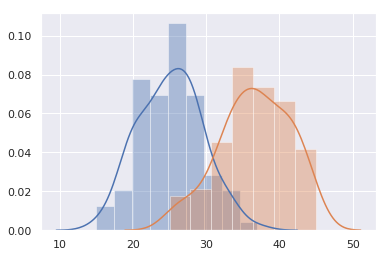

In [300]:
# Overlay of Sample_X and Sample_Y plots
sns.distplot(Sample_X)
sns.distplot(Sample_Y)
plt.show()

The plot matches our expectations.

**However, let's again look at this in more detail by working it manually to get a sense of what's happening on the back-end.**

Once again we'll need to calculated the standard error first-- this time for each of our samples. The standard errors are then pooled together as $\sqrt{SE_1^2 +SE_2^2}$.

In [0]:
# First individually for each sample
SE1 = Sample_X.std(ddof=1)/np.sqrt(len(Sample_X))
SE2 = Sample_Y.std(ddof=1)/np.sqrt(len(Sample_Y))
# Then pooling the two together
SEs = np.sqrt(SE1**2 + SE2**2)

Next we'll compute the z-score (this should be the same as found above). While we have a helper function for this, let's write it out directly to emphasize that we're now looking at the difference in two means. Which sample we subtract from which is arbitrary as we'll use the absolute value later.

In [302]:
# Calculating the z-score
z = (Sample_X.mean() - Sample_Y.mean()) / SEs
z

-17.790853299202226

And finally we can calculate the p-value. If we take the absolute value (`abs()` below) of the z-score to simply mean the raw difference between the two means, we can simply use the survival function `sf()` to see what the probability of finding values with a higher z-score is. However, the test is two-twailed, so we also want values more extreme in the other direction (less than the negative version of the z-score). Since the standard normal distribution is symmetric about 0, we can simply multiply the probability from the survival function by 2 to obtain this.

In [303]:
# Finding the p-value given our z-score
stats.norm().sf(abs(z)) * 2
# Alternatively stats.norm().cdf(-abs(z)) * 2

8.320317277726217e-71

And indeed we get the same very tiny p-value indicating the two means are indeed different.

### Two Sample Means by Critical Value <a name="z_two_samp_crit"></a>

When asking if two means are different, it can be somewhat confusing as one might argue that surely the means *must* be different, even if only be some fractional degree (i.e. 0.0000001 difference). Demonstrating a difference by p-value however does address this as it's akin to asking "How extreme is the difference between these two means?" as evaluated by the probability of finding the test statistic derived from them.

However, another way of viewing this that may make more sense is running the test by use of a **critical value** rather than a p-value. We would expect the results to be the same, as they use the same fundamental philosophy, but it may add clarity.

Critical values are values of test stastitics whereby some percentage (determined by your confidence level) of all the values in the distribution are below. This means that if your value, i.e. from your sample(s), is greater than this value (the critical value), then your value is not found in that whole percentage range. So if your confidence level is 95% which returns a critical value of 5, then 95% of that distribution is less than 5. If your sample then returns a test statistic greater than 5, then it falls outside of 95% of the values on the distribution. You then have some evidence that this value is not due to chance. 

Let's try this as a repeat of the previous scenario.

To do so, we first need to compute the critical value. We can calculate this from the percentage point function `ppf`. This is the inverse of the cumulative distribution function `cdf` in that it instead takes a percentage point value and then returns the value at which the inputted percentage of values on the distribution are less than. (Alternatively, for greater-than interrogations, we could use `isf()` the inverse of the survival function).

We can thus feed the percent point function our confidence level (i.e. 99% -> 0.99) to return the value which 99% of the values on the distribution are less extreme than. This then returns the "critical value" at that confidence level for that distribution.

For a one-tailed test we would simply use `.ppf(confidencelevel)` or `.isf(alpha)` (alpha being 1 - the confidence level). For a two-tailed test however, we want to look at both tails of the distribution.

To do this, we must distribute our uncertaity across both tails of the distribution. When considering this as an alpha value, all we have to do is cut it in half. So a confidence level of 95%, alpha of 0.05, means we look at an alpha of 0.025 on both ends of the distribution.

When considering this as a confidence level, this means half of the percentage points comes back on each tail. For instance, if we have a confidence level of 0.95, then 1 - 0.95 gets contributed back to both tails. As such we would input 0.975 (which is 0.95 + 0.025) into the ppf function. Formulaically, we are then inputting $(1 + confidence) / 2$ into the ppf, or $\lvert  confidence - 1 \rvert /2$ into the isf.

We'll calculate the critical value at a 99% confidence below. Since we are interested in whether  two means are different, this is two-tailed.

In [304]:
critval = stats.norm().ppf((1+0.99)/2) # so ppf(0.995)
# alternatively critval = stats.norm().isf(abs(1 - 0.99)/2), so isf(0.025)
critval

2.5758293035489004

If the absolute value of our test-statistic (here the z-score) is greater than this value, then that means it is *more* extreme the other values in the distribution up to our given confidence level. Thus if our test-statistic is greater than the critical value, it's unlikely we would have gotten it by chance. Similar to above, we use the absolute value as we're interested in differences between the means regardless of which is bigger (i.e. in which direction we subtract).

Let's compare the two:

In [305]:
# Printing both values
(abs(z), critval)

(17.790853299202226, 2.5758293035489004)

The z-score is clearly larger than the critical value (i.e. it is rare we would get this value). Remember that the z-score represents a standardized version of the difference between the two means. This then is to say that, at 99% confidence, it would be rare to get a difference in means (represented by the test statistic) above this critical value.

As such, we believe the means really are different, which corresponds with the results of our comparison by p-value.

## T-test <a name="t"></a>

More likely to be used in real application than the z-test is the t-test which is used when the population standard deviation is unknown (as is the case most of the time) and/or when the sample size is small. Accordingly, this test is based off of the t-distribution.

This distribution has heavier tails which helps deal with outlying points in smaller sample sizes but is an estimated case of the normal distribution and increasingly approximates the normal with higher sample size.

The t-distribution has one parameters **degrees of freedom (df)** defined as the "sample size - 1" and utilizes the t-statistic.

### T-statistic <a name="tstat"></a>

Let's first create a helper function to get at the t-statistic directly. The Python functions used for a t-test will report the t-statistic, but it's listed here to see the general form and in case we want to use it on the back-end.

Of note, this is a simple version for one sample/population. When comparing two samples, for instance, the standard errors must be pooled.

In [0]:
# Define a function for the tstatistic
# Note that this is a simple calc for one sample
def tstat(smean=0, mu=0, s=1, n=1):
  t = (smean - mu)/(s/np.sqrt(n))
  return t

It is worth noting that the t-stastitic nearly mirrors the z-score. However, in this case, we immediately acknowledge use of standard error rather than standard deviation (as we don't know the population deviation).

### One sample vs Population (t-test) <a name="t_one_samp_ttest"></a>

Let's now use our `Sample_Ages` and `Population_Ages` data to check whether the sample mean is likely a significant difference from the population mean. We must pretend here that we don't have access to the population dataset for this to be meaningful, though we do have its mean. Also given how we set up the data, we do expect them to be different.

***Given `Sample_Ages` as our sample, is the sample mean significantly different that that of the population mean?***

**Null Hpothesis:** $\bar{x} = \mu$

**Alternative Hypothesis:** $\bar{x} \ne \mu$

Scipy has a function for a two-sided, 1 sample t-test-- `stats.ttest_1samp()`-- though it doesn't appear Statsmodels does as of time of this writing.

In [307]:
# Performing the t-test
stats.ttest_1samp(a=Sample_Ages, popmean=Population_Mean)

Ttest_1sampResult(statistic=-19.260308025028255, pvalue=1.817235373702955e-29)

The t-stastic and p-value are returned. The p-value is very small and certainly below 0.01, so here we should reject the null hypothesis and thus find strong evidence of the alternative, that the means are different.

Of note, this is a two-tailed test, and Python does not seem to included a one-tailed (i.e. testing that the sample mean is greater or less than the population mean). This, however, is intentional as to get such a value, all one would need to is divide the two-tailed p-value by 2. Statsmodels does however have a function for two one-sided ttests ([ttost](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttost_ind.html#statsmodels.stats.weightstats.ttost_ind)).

This makes sense as our sample and population means are both quite different with large sizes:

In [308]:
Sample_Mean, Population_Mean

(23.957142857142856, 34.248)

**However, we could also conduct this test manually to verify.**

First, we need to compute the t-statistic. Let's use our helper function from earlier.

In [309]:
# Calculating the t-statistic
t = tstat(smean=Sample_Mean, mu=Population_Mean, s=Sample_Ages.std(ddof=1), n=len(Sample_Ages))
t

-19.260308025028255

The t-statistic is the sample from SciPy's function. Now we need to compare the t-statistic to the t distribution. We want to know what's the probability of finding t-stat values on the distribution more extreme than this, so we can look for values less than our already negative t-stat, but if so, we'll need to multiply it by 2 because we also want to know the probability of values more extreme than the positive version as well.

We can use the cumulative distribution function or survival function to calculate the probabilities.

The t-distribution here takes one parameter -- degrees of freedom -- which is equal to n - 1.

In [310]:
# Calculating the p-value
stats.t(df=(len(Sample_Ages) -1)).cdf(t) * 2
# Alternatively stats.t(df=(len(Sample_Ages) -1)).sf(abs(t)) * 2

1.817235373702955e-29

The two p-values agree.

### One sample vs Population (confidence interval) <a name="t_one_samp_confint"></a>

For the case as above, we can compute a confidence interval for the sample mean. Scipy also has a method on the t distribution for this. To do so however, we will first need to calculate an estimate of the population standard deviation, sigma, before calculating the interval.

We'll computer here at the 95% confidence level.

In [311]:
# First computing sigma to estimate the standard deviation
sigma = Sample_Ages.std(ddof=1)/np.sqrt(len(Sample_Ages))

# Then calculating the confidence interval using SciPy's function
# Note that per the docs, alpha means the confidence level here, not the actual alpha value (oddly)
stats.t.interval(alpha=0.95, loc=Sample_Mean, scale=sigma, df=(len(Sample_Ages)-1))

(22.891235798797453, 25.023049915488258)

Alternatively, StatsModels has a method `tconfint_mean(alpha=)` to calculate the confidence interval off of the `DescrStatsW(somearray)` object.

In [312]:
# Statsmodels method. Note here alpha really means alpha unlike in SciPy
sm.stats.DescrStatsW(Sample_Ages).tconfint_mean(alpha=0.05)

(22.891235798797453, 25.023049915488258)

Our interval here argues that, if we repeatedly randomly sample from our population, 95% of the sample means would fall within this range. Looking at the two means and give the sample size, this makes sense:

In [313]:
(Sample_Mean, Population_Mean)

(23.957142857142856, 34.248)

And even if we increase our confidence level to 99%, thus widening the interval of the ranges we are "sure" of, it still doesn't include the population mean.

In [314]:
stats.t.interval(alpha=0.99, loc=Sample_Mean, scale=sigma, df=(len(Sample_Ages)-1))
# Alternatively sm.stats.DescrStatsW(Sample_Ages).tconfint_mean(alpha=0.01)

(22.541784314157187, 25.372501400128524)

But we should also be able to compute this manually. To do so, we first need to compute a critical value at our confidence level (let's say 95%). As we've seen earlier, we can use the `ppf` function to look for a value below which that the inputted percentage point (our confidence level) lays.

However, this is a two-tailed test so we must spread our uncertainty across the two tails of the distribution. As such we distribute half of alpha (0.05 / 2 = 0.025) to each half and input .95 + 0.025 (0.975) into our ppf (or $(1+confidence)/2$).

In [0]:
# Calculating the critical value
critval = stats.t(df=(len(Sample_Ages)-1)).ppf((0.95+1)/2) # so ppf(0.975)
# alternatively critval = stats.t(df=(len(Sample_Ages)-1)).isf(0.025)

Once the critical value is calculated, we can then calculate the confidence interval which is simply the mean +/- the critical value times sigma.

In [316]:
# Calculating the confidence interval
interval_left = Sample_Mean - (critval * sigma)
interval_right = Sample_Mean + (critval * sigma)

(interval_left, interval_right)

(22.891235798797453, 25.023049915488258)

Which returns the same confidence interval as before.

### Two Dependent Samples (Paired) <a name="t_two_dep_samples"></a>

In an dependent (or "paired") t-test, we compare compare samples taken from the ***same*** group, though they have been exposed to different treatments. As such, you will end up with two datasets and can literally pair up observations between the individuals in each group. This means we use a modified t-statistic that is based on the mean difference as well as the standard deviation of the difference between the two samples. Any test for normality would also be on the difference between the means.

Conducting the test however is mechanically similar to before. Let's rename some data pulled from previously created samples to be consistent with the scenario:

In [0]:
# Renaming the data we created to be consistent with the scenario
# A paired test should be the same size, so let's pull 15 out of both sets randomly
Treatment_A = np.random.choice(Sample_Ages_A, size=15, replace=False)
Treatment_B = np.random.choice(Sample_Ages_B, size=15, replace=False)

And now our scenario:

***Given `Treatment_A` and `Treatment_B` are individuals from the same group but different treatments, is their difference statistically significant?***

**Null Hpothesis:** $\mu_d = 0$
(the two means are equal)

**Alternative Hypothesis:** $\mu_d \ne 0$
(the two means are not equal)

Scipy has a function for this (Statsmodels does not appear to yet). As we've shown a lot of the background in previous examples, we'll just show the test here.

In [318]:
# Performing the paired t-test
stats.ttest_rel(a=Treatment_A, b=Treatment_B)
# And that's it!

Ttest_relResult(statistic=-0.4567754538076584, pvalue=0.65483917443199)

The implementation then is pretty simple, and here we can see the returned p-value is less than 0.05, thus we can reject the null hypothesis at the 95% confidence interval with evidence that there is a significant difference.

Note that while this is simple here, the function does not have a parameter for if you wanted to test there being an explicit difference between the two sample means (rather than that difference being 0 as is here). If we needed this, we might have to hard-code it.

### Two Independent Samples (Unpaired) <a name="t_two_ind_samples"></a>

In an independent (or "unpaired") t-test, we compare samples from two ***different*** groups, though these groups may be exposed to the same treatment. Since they are from two different groups and here we are comparing the means of each sample directly (rather than subtracting each pair as in the paired test), the groups do not need to be of the same size.

The t-statistic here then subtracts the means of each sample in the numerator as well as the expected difference between the two groups (though this is usually 0 and thus drops out). In the denomenator the standard errors must be pooled together. The degrees of freedom are pooled similarly (here, df = n1 + n2 - 2). Mechanically this is similar to the two sample z-test example we worked earlier, so we won't address that here.

One assumption of this test however is that, whereas the sample sizes may differ, it expects homogenity of variance amongst the two samples-- that is, it expects **homoscedasticity**. There are a few tests for this, including the ability of using the f-test and Levene's test, but we'll use Levene's here as it is acknowledged as rather robust.

If the two samples were not homoscedastic, we might could perform a **Welch's t-test** instead which does not make this assumption.

Levene's test tests under the null hypothesis that all samples are taken with populations with equal variances. That is, low p-values will cause us to reject the null and believe they actually do have different variances. As such, in this case, we want a high p-value.

Scipy has a simple function for this as implemented below. Let's use our `Sample_Ages_A` and `Sample_Ages_B`:

In [319]:
# Implementing Levene's test to test for homoscedasticity
stats.levene(Sample_Ages_A, Sample_Ages_B)

LeveneResult(statistic=0.052421496239700105, pvalue=0.8195892252565622)

The p-value here is particularly high, certainly higher than any alpha level we would use, so we can work under the assumption of homoscedasticity.

Now, let's implement the t-test on our two samples with this scenario.

***Given `Sample_Ages_A` and `Sample_Ages_B` as two independent samples, is the difference in their means statistically significant?***

**Null Hpothesis:** $\mu_a = \mu_b$

**Alternative Hypothesis:** $\mu_a \ne \mu_b$

As this is a common test, there are a number of different ways to implement. Let's run each below the given scenario:

In [320]:
# Scipy's ttest_ind
# equal_var is whether or not the variances are equal
# If set to false, performs a Welch's t-test instead
stats.ttest_ind(a=Sample_Ages_A, b=Sample_Ages_B, equal_var=True)

Ttest_indResult(statistic=-4.048838367272335, pvalue=0.00013427238389162924)

In [321]:
# Scipy's ttest_ind_from_stats
# This one is useful for when you don't have both full sample arrays but do have their statistics
# It also takes equal_var as a parameter
stats.ttest_ind_from_stats(mean1=Sample_Ages_A.mean(), # First sample mean
                           std1=Sample_Ages_A.std(ddof=1), # First sample standard deviation
                           nobs1=len(Sample_Ages_A), # First sample size
                           mean2=Sample_Ages_B.mean(), # Second sample mean
                           std2=Sample_Ages_B.std(ddof=1), # Second sample standard deviation
                           nobs2=len(Sample_Ages_B), # Second sample size
                           equal_var=True) # if false performs Welch's t-test

Ttest_indResult(statistic=-4.048838367272335, pvalue=0.00013427238389162924)

In [322]:
# Statsmodels's ttest_ind
# This has the utility of setting the value and alternative parameters
sm.stats.ttest_ind(x1=Sample_Ages_A, x2=Sample_Ages_B,
                   alternative='two-sided', value=0) # value represents the hypothesized difference between the means if any

# returns (t-stat, p-value, degrees of freedom)

(-4.048838367272335, 0.00013427238389162924, 68.0)

As we can see here all versions return the same p-value, one small enough that we can reject the null with a more than 99% confidence. That is we have evidence that the difference between the two samples is statistically significant.

### Welch's T-test <a name="welch"></a>

Welch's T-test is a modification of the (unpaired) two sample independent t-test to account for unequal variance. Mechanically it is otherwise simpler.

While the standard independent t-test outperforms Welch's t-test when two samples have equal variance, Welch's t-test is considered by many experts to be the more robust of the two tests and in most cases provides comparable results to the independent t-test even when variances are equal (the main exception being small sample sizes). As such, and given that variances may not be equal in the real world, **many experts believe it safe to use Welch's t-test as the default (that is, between the two) without even needing to test for homoscedasticity.**

Welch's t-test is built in to many of the standard Python functions. For the Scipy versions of the test, simply set `equal_var` to false. For the Statsmodels version of the test, set `usevar` to "unequal", and the Welch's test will trigger automatically.

## ANOVA <a name="ANOVA"></a>

### Conceptual Background

ANOVA stands for "Analaysis of Variance" and is used to examine significant difference among 3 different populations. Whereas it is possible to glean information similar to the standard ANOVA by running multiple t-tests, doing so increases the **family-wise error rate** which is the probability of making false discoveries (Type I errors) when performing multiple hypothesis tests.

**Note that the family-wise error rate of a test can be calculated as $\bar{\alpha} = 1 - (1 - \alpha_{comparison})^k$ where $k$ is the number of tests and $\alpha_{comparison}$ the significance level of each test. This is the overall confidence level of multiple tests due to Type I errors. This then gives you the chance that at least one of the k tests is incorrect due to Type I errors.**

Using ANOVA, however, controls for this, thus producing more robust results.

ANOVA may be thought of as a collection of statistical tests, but At its base, ANOVA tests for an association between a categorical predictor variable (or factor), with various "levels," and a response variable. As such, it utilizes the a different test statistic-- the **F-statistic** (and accordingly, the f-distribution).

### F-statistic

As we are comparing multiple groups in ANOVA, the F-statistic is a ratio of variance of that between groups vs that within groups. Accordingly, the f-distribution takes both between-group degrees of freedom and within-group degrees of freedom as parameters.

Specifically for a simple (one-way) ANOVA:
* $F = \frac{between-group \ variance}{within-group \ variance}$
* Degrees of Freedom:
 * Between groups: $k - 1$, where k is the number of levels
 * Within group: $n - k$, where n is the overall sample size

In order to compute the F-statistic, other mathematical concepts are required. These are generally tabulated together in an **ANOVA table** to report both variance stastitics and calculate the F-statistic:
* **Sum of Squares Between Groups (SSB)** - Measures variability between groups
* **Mean Squares Between Groups (MSB)** - Measures between-group variance. This is equal to the SSB divided by the between group degrees of freedom.
* **Sum of Squares Within Groups (SSW)** - Measures within-group variability
* **Mean Squares Within Groups (MSW)** - Measure within-group variance. This is equal to the SSW divided by the wtihin-group degrees of freedom.


### Types of ANOVA <a name="anova_types"></a>

As noted, ANOVA can be said to be a family of statistical tests:

* **(Basic) ANOVA** - Tests for mean differences between 3 or more groups by a continuous response variable. There are two main types:
 * **One-Way ANOVA** - Tests a single factor (with multiple levels/groups) against a single response variable
 * **Two-Way (or n-way) ANOVA** - Tests levels from multiple factors (two or more) against a single response variable
* **ANCOVA** - Analysis of Covariance. Includes both a categorical factor and a contiunous variable (the **"covariate"**) as independent variables against the continuous response variable (the dependent). The covariate is useful as a control as the dependent variable is expected to also vary in accordance with the covariate (often called the "confounding" variable).
 * Can run one or two-way ANCOVAs.
 * This can be modelled through regression.
* **MANOVA** - Multivariate Analysis of Variance. ANOVA but will multiple continuous response variable. Similarly can have one or two-way variants.
* **MANCOVA** - Multiavariate Analysis of Variance. I.e. the MANOVA version of ANCOVA. Multiple response variables viewed via a independent categorical and independent continous.

### One-way ANOVA <a name="one_way_anova"></a>

A One-Way ANOVA asks whether there is any signifianct difference between the means of the relevant groups. The null then is that the means of each group are equal in the population. The altnerative hypothesis does ***not*** tell us which group's mean is significantly different from the rest. As such, if a significant difference is found, one could then do post-hoc testing to drill down to find further information. However, this is still useful for examining multiple groups at once (for instance, in exploratory data analysis).

Mechnically this test works similar to other test in that a test statistic is calculated (here the F-statistic) and is compared to the appropriate distribution (the F-distribution here) to return a p-value. One can see why this test does not tell us which group is more different when reviewing that the F-statistic pools together the ratio of variances for all groups.

Let's set up a scenario given the samples we have created so far.

***Given Samples A, B, X, and Y, are the means of the corresponding populations all the same?***

**Null Hpothesis:** $\mu_a = \mu_b = \mu_x = \mu_y$

**Alternative Hypothesis:** There exists at least one significant difference between the populations.
(Note that this is ***not*** the same as saying all the populations are different)

Scipy has a function `f_oneway` for this taking the various samples as array arguments.




In [323]:
stats.f_oneway(Sample_Ages_A, Sample_Ages_B, Sample_X, Sample_Y)

F_onewayResult(statistic=158.32766919786576, pvalue=6.9936281105958905e-59)

This returns the F-statistic and the p-value. We can interpret the p-value in the same way as before. The p-value is far smaller than 0.01, so we can say that, with beyond a 99% confidence level, that the means are not equal.

This report is somewhat wanting however as it doesn't report relevant factors like the degrees of freedom. One way to get this all quickly would be to use Statsmodels regression function `ols` and dummy-coding the categorical variables.

From here, we could do a few post-hoc tests to see which groups really differ:
* **Fisher's Least Significant Difference** - Effectively a series of pair-wise t-tests. We did not *begin* with this both for time and family-wise error rate, but since ANOVA has shown a difference, we (arguably) safely expect to find one here.
* **Bonferroni Correction** - Again do multiple t-tests, but consider your alpha level to be that used in the ANOVA divided by the number of tests done. This effectively makes it "harder" to reject the null in the t-test to avoid family-wise errors, but it is arguably unnecessarily conservative.
* **Tukey HSD (Honestly Significant Difference) test** - Another pair-wise test with a different metric. This test is also considered conservative. Statsmodels has an [implementation](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) of this.

### (n-way) ANOVA and ANCOVA <a name="n_anova_ancova"></a>

In an n-way ANOVA, we compare multiple categorical factors against a response variable. In Python, this can be done through regression with coding of variables. Here is a [handy tutorial](https://pythonfordatascience.org/anova-2-way-n-way/) on this.

In ANCOVA we include a covariate (a continuous independent variable we expect the response to vary with) along with our categorical independent. In Python, this also is best-modelled through regression.

### MANOVA <a name="MANOVA"></a>

MANOVA includes multiple response variables but otherwise is similar to ANOVA methodology. Importantly, it is a multivariate analysis. It can also be worked through regression, though Statsmodels has a [specific implementation](https://www.statsmodels.org/stable/generated/statsmodels.multivariate.manova.MANOVA.html) for MANOVA. Also here is a [handy tutorial](https://www.marsja.se/python-manova-made-easy-using-statsmodels/) for MANOVA in Python.

# Nonparametric Tests <a name="nonparametric"></a>

Unlike parametric tests which make assumptions about the statistics of the population distribution (and accordingly assumes the statistical distribution can be modelled with a fixed parameter set), nonparametric tests make no (or at least minimal) such assumptions.

While nonparametric tests then allow for tests that don't require drawing from a specific distribution or large sample sizes and thus are more robust, they are comparatively less powerful in instances where a parametric test would be valid. 

In statistics, **power** means the probability to properly reject the null hypothesis. As such, nonparametrics tests being less powerful compared to valid parametric test, means they may be more prone to Type II errors.

## Normality Testing <a name="normality_testing"></a>

One reason you might decide to use a nonparametric test is if you suspect your distribution is non-normal, or more precisely, deviates from the normal in a manner too extreme to perform your parametric test.

It is worth remembering, however, that a parametric test may be robust to non-normal distributions at large n due to the Central Limit Theorum. Moreover, all distributions will of course have some deviation from the normal (however large or small).

As such, while the methods below should certainly be considered, normality testing is more likely useful at small sample sizes or in large sample sizes when the deviation from the normal (such as by skewness) is particularly extreme. Otherwise, evidence of a non-normal distribution does not necessarily indicate sufficient reason to use a non-parametric test.

### Skewness <a name="skewness"></a>

One case in which a non-parametric test may be prefered is when the data is particularly skewed.

Let's create some skewed data to visualize. Scipy has a `skewnorm` function for this wherein its parameter `a` reflects the degree of skew.

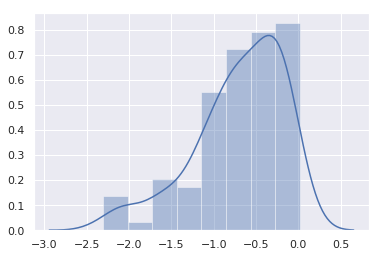

In [324]:
# Creating a visualizing the skewed data
# "a" is a parameter denoting how much to skew the data
Sample_Skew = stats.skewnorm(a=-20).rvs(size=100, random_state=1)
sns.distplot(Sample_Skew)
plt.show()

The data in the above graph is clearly skewed to the left. One way to calculate a sense of skew is:

$skewness = \frac{3 (mean - median)}{standard deviation}$

This method is one of Pearson's coefficient of skewness methods, though there are others. We'll calculate this coefficient below.

In [410]:
# Calculating the skew coefficient
skew = 3 * (np.mean(Sample_Skew) - np.median(Sample_Skew)) / Sample_Skew.std()
skew

-0.3933571613867879

The negative sign indicates the data is skewed to the left. To make sense of the magnitude however, we also need the **standard error of skewness (SES)** which is the measure of deviations within random subsets of the data (the formula for this can be reduced to only require n as an input). We'll create a function for that below (Scipy does not appear to have an implementation of this).

In [0]:
# Function for standard error of skewness
def s_error_skew(n):
  standard_error_skewness = np.sqrt(((6*n)*(n-1))/((n-2)*(n+1)*(n+3)))
  return standard_error_skewness

The actual value we then scrutinize is the ratio of the the skew coefficienct to the SES, calculated below.

In [405]:
# Calculating the SES for our example
SES = s_error_skew(len(Sample_Skew))

# Then showing the ratio
skew / SES

-1.6296193614519452

When determining whether the data is "too skewed" we consider the ratio of skewness to the SES. If that value approaches 2 or greater (in either direction), the data is likely too skewed to be meaningfully used with the t-test (though other parametric tests may accomodate the skew more appropriately). The "greater than 2" rule here comes from asking whether the skewness falls within a range of the standard error of skewness in either direction. So if the skewness value is greater than twice the standard error of skewness (pos or neg), it can't possibily fall in that range. In this case, the data may not be too skewed to use with a t-test given the sample size, but we should investigate our assumptions.

There are other metrics of skewness, however. For instance, Scipy has an implementation returning a version called the Fischer-Pearson coefficient, calculated below:

In [411]:
# Calculating skew using Scipy
stats.skew(Sample_Skew)

-0.9828669843178592

A general rule of thumb in evaluating this skewness metric (and many others is):
* -0.5 < Skewness < 0.5 - Reasonably normal
* -1 < Skewness < -0.5 OR 0.5 < Skewness < 1 - Moderately skewed
* Skewness < -1 OR Skewness > 1 - Very skewed

However, interpretation should be contextual. Many methods may be robust to skewness, or robust at certain sample sizes. In this particularl case, if we got these skewness values at small sample sizes we should definitely consider a nonparametric test. At very large sample sizes, this may not matter.

For instance, when considering means testing, some tests (the t-test included) are robust to non-normality (and thus skewness) at large sample sizes according to the Central Limit Theoreum. As such, even if the sample data is skewed, a t-test may still be appropriate if the sample size is large enough (i.e. n>30 for light skewing). However, the Central Limit Theorum does not tell us "how large" is large enough. So with extreme skewing we should consider even larger sample sizes or a nonparametric test.

Given the above considerations, a visual consideration of the distribution may suffice in most cases.




### Kurtosis <a name="kurtosis"></a>

Kurtosis refers to the weight of the tails in the distribution compared to that of the normal (which would have a kurtosis of 0 given all correction terms). As such, it refers to the relative distribution of values towards the tails as opposed to the center. It is often referred to as the "tailed-ness" of the distribution.

Regarding kurtosis, a distribution can be said to be:
* **mesokurtic** - No excess kurtosis (i.e. normal)
* **leptokurtic** - Positive excess kurtosis -> fatter tails (i.e the t-distribution). "Lepto" means "slender.""
* **platykurtic** - Negative excess kurtosis -> thinner tails (i.e. bernoulli distribution). "Platy" means "broad."

Technically a normal distribution has a kurtosis of 3, so "excess" kurtosis is the kurtosis after subtracting 3 as a correction term.

Scipy has a function `kurtosis` to calculate this.

We could compare some data from a simulated normal and simulated t-distribution as an example.

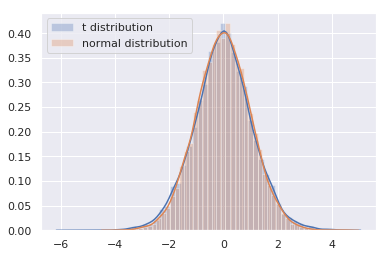

In [328]:
# Setting up our simulation
tsim = stats.t(df=15).rvs(size=10000)
nsim = stats.norm.rvs(size=10000)

# Visualizing the distribution
sns.distplot(tsim, label="t distribution", hist_kws={"alpha":0.3})
sns.distplot(nsim, label="normal distribution", hist_kws={"alpha":0.3})
plt.legend()
plt.show()

In [329]:
# Calculating the kurtosis of both
stats.kurtosis(tsim), stats.kurtosis(nsim)

(0.5256838846892031, 0.17168112365237276)

As we can see, the t-distribution has positive excess kurtosis (is leptokurtic), while the normal distribution's kurtosis is close to 0.

Values between +1 and -1 are generally considered fine to use in many parametric tests, and values between +2 and -2 can sometimes give useful results also.

It is worth noting, however, that inference about means is relatively robust to kurtosis (as seen above, the t-distribution is even expected to have some), while skew may play a more predominant role is deciding if we should use a nonparametric test. As such, kurtosis is often not considered a huge determining factor in whether or not to use a nonparametric test.

### Statistical Tests of Normality <a name="statistical_tests_normality"></a>

Aside from reviewing measures like kurtosis and skewness directly, a number of statistical tests exist to ascertain whether the population a sample is derived from is likely normal. In such tests, the null hypothesis is that the distribution is normal, and the alternative that it is not.

A number of troubles exist when using these tests however:
* We expect all distributions to deviate slightly from the normal. As such, many of these tests will result in a statistically significant p-value (for difference from the normal) at high sample sizes. And yet, at high sample sizes, a parametric test may be robust to nonnormality.
* At low sample sizes, some of the statistical tests are not powerful enough to detect deviations from the normal.
* There is no one nonnormality test that is best for all situations. Some have more or less power in different cases. As such, one would want to study their characteristics and employ the most applicable test.
* The tests do ***not*** address the question "Is this deviation from normality strong enough to not use a parametric test?". As such, their utility should be considered.

For the above reasons, statistical tests for normality may not be particularly useful in many cases where inference about means is employed (or other cases where the Central Limit Theorum would kick in). However, they may be useful in small sample sizes or other unique cases.

Given this, we'll not spend time employing such tests here but rather briefly list a few popular ones:
* **Jarque-Bera** - Tests whether the skewness and kurtosis of the sample data matches a normal distribution.
* **Shapiro-Wilk** - A popular test for non-normality with relatively high power.
* **Anderson-Darling** - Another, though generally noted as less power than Shapiro-Wilk
* **Kolmogorov–Smirnov** - This one requires that the mean and variance of the normal are assumed known under the null.

There are man others. This [blog](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) and this [wiki page](https://en.wikipedia.org/wiki/Normality_test) discuss some of the utilities between each. Python functions exist for many such cases but will not be covered here.

### Graphical Tests of Normality <a name="graphical_tests_normality"></a>

In many cases, given our considerations regarding testing normality above, it may be reasonable to do a simple visualization of the data to test for normality.

The simplest method of this is simply to plot a histogram of the distribution. This allows for a quick check of skew, kurtosis, multi-modality, and the general overall shape.

Another method worth discussing however is the **QQ-plot** which is the "Quantile Quantile" plot. A QQ plot creates an idealized distribution version to compare the sample data against at various quantiles along the probability distribution. The idealized values are represented on one axis with the sample data values on the other axis.

So to check for normality, a QQ plot against the normal distribution could be used. If the sample data agrees with the idealized distribution, all points will lie on the 45 degree angle line (where y=x).

Statsmodels has an implementation of this we'll use on our skewed data.

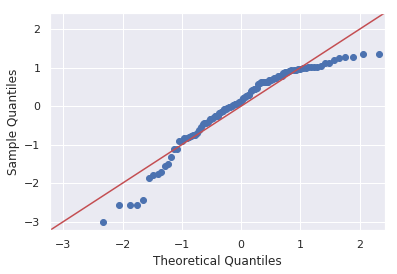

In [330]:
# QQ plot of our sample data with a y=x line
# "fit=True" passes the sample mean and standard deviation to the distribution
# The distribution defaults to normal unless noted otherwise
sm.qqplot(Sample_Skew, line='45', fit=True);
# Note due to a bug in Jupyter notebooks this will sometimes print two plots.
# The way to suppress this is to add the semicolon afte the function call

As seen above, we have a number of values departing a good ways below the expected on the left. Given a small sample size, this should give us pause to inspect the distribution in more detail and then consider if a non-parametric is warranted.

## Resampling <a name="resampling"></a>

Resampling refers to nonparametric methods where we "redraw" from our sample to make inferences, relying on the deviation inherrent within our sample to help us learn about our uncertainy overall.

There are two main methods-- resampling with and without replacement.

### Bootstrapping (Resampling WITH replacement) <a name="bootstrapping"></a>

Bootstrapping is resampling with replacement. In bootstrapping we create many (typically >10,000) new samples by drawing out of our sample ***with replacement*** and compute the sample statistic we are interested in from these new samples. The created distribution of this statistic is now our bootstrap distribution. The hope is that this distribution emulates our theoretical sampling distribution, and given that the mean of the sampling distribution ~ the population, this should tell us something about our data.

If this seems strange and impossible (hence the term "bootstrap" from the impossibility of pulling oneself up by one's own bootstraps), we must remember the assumption here is that the sample is representative of the population. And while stated thusly, this may seem a big ask, we must also remember that all other statistical tests previously employed also rely on similar assumptions. Morever, this mainly is meant to help us learn about our uncertainty by utilizing the deviation already inherrent within our sample. *After all, in many cases, our sample is all we know about the population.*

Bootstrapping has the benefits that it makes no assumption about the population distribution, can work with fairly small sizes, and can be used to compute many different aspects about the data (even beyond the mean). It has the down-side (or at least historically did) of being computationally expensive to create many resamples and may not be as powerful as a parametric test when the parametric assumptions hold.

Generally bootstrapping is used to create confidence intervals rather that hypothesis testing through p-value. This is because a bootstrap distribution emulates the sampling distribution (and thus, in a way, the alternative hypothesis) rather than the null hypotehsis.

#### Bootstrapping Confidence Intervals <a name="bootstrap_confidence_intervals"></a>

Since bootstrapping emulates the sampling distribution directly (as opposed to parametric distributions like the t which represent the null distribution), once it has been created, we can simply compute confidence intervals from percentiles in the bootstrap distribution.

It's worth noting that there are other methodologies (potentially more apt) to calculate confidence intervals from a bootstrap distribution that may be more appropriate, but the percentile method below can be quite reasonable.

Let's use `Sample_X` and `Sample_Y` as a demonstration here and assume we were interesting in something like:

**Null Hpothesis:** The two samples are drawn from the same distribution.

**Alternative Hypothesis:** The two samples are drawn from different distributions.

To create a bootstrap confidence interval, all we need are numpy functions.

But first, lets examine the means just to have an idea of what to expect.

In [331]:
# Checking the of our samples
Sample_X.mean(), Sample_Y.mean()

(25.14, 36.63)

Now we will resample with replacement (i.e. "bootstrap") from each sample. Typically this is done 10K or 100K times with a draw the same as the sample size. Numpy's `random.choice()` works perfectly for this.

We then compute the mean of each sample and create a new distribution that is the difference of the two samples (if this were a one-sample case, we wouldn't have need for any subtraction).

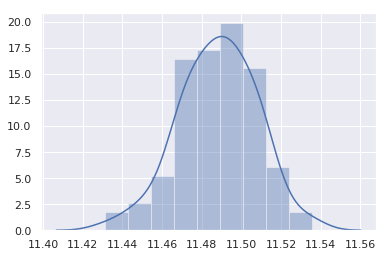

In [332]:
# Create the bootstrap distribution for Sample_X and Sample_Y
boot_X = np.random.choice(Sample_X, size=(len(Sample_X),100000), replace=True).mean(axis=1)
boot_Y = np.random.choice(Sample_Y, size=(len(Sample_X),100000), replace=True).mean(axis=1)
# In the above, axis=1 will do the mean across each row (i.e. across each new sample)

# Create the bootstrap distribution for the difference of means
boot_diff = boot_Y - boot_X

# Visualize the distribution of the mean differences
sns.distplot(boot_diff)
plt.show()

The distribution of the difference of means is about what we would expect (centered around 11 something). Note that this distribution represents the emulated sampling distribution of the difference of means.

Since it does, we can calculate the confidence interval directly by asking which values cap off a certain percentage of the data (based on our confidence level).

We can do this using Numpy's `percentile` function. Let's look at it for a 95% confidence level (two-tailed).

In [333]:
# Calculating the confidence interval through bootstrap
np.percentile(boot_diff, q=2.5), np.percentile(boot_diff, q=97.5)

(11.447471749999998, 11.52294025)

The confidence interval does not include a mean difference of 0 (nor anywhere close). As such, we would expect to reject the null hypothesis here.

But let's get the confidence interval also by the typical t-statistic method to see how close this gets.

In [334]:
# Calculating confidence interval by t-test for comparing
sm.stats.DescrStatsW(boot_diff).tconfint_mean(alpha=0.05)

(11.48430210923499, 11.492048490765006)

Quite close! The bootstrap confidence interval is ever so slightly wider, so we can see how it might be less powerful than a parametric test, but this works well enough here.

Of note, we could also do a bootstrapped distribution of calculated t-statistics as well.

#### Bootstrap Hypothesis Test <a name="bootstrap_hypothesis_test"></a>

To do a typical hypothesis test via bootstrap, we aim to simulate the null distribution from our sample and then ask what proportion of (and thus what probability) of the null distribution allows for differences as extreme as what we saw from the two samples.

**Again let's use `Sample_X` and `Sample_Y` as our given...**

**Null Hpothesis:** The two samples are drawn from the same distribution.

**Alternative Hypothesis:** The two samples are drawn from different distributions.

First we need to shift our samples so that they are centered around what their values would be if under the null.

To do this, we first recognize that, given the null, the two samples come from the same population. So we can emulate that mean by finding the mean after combining both samples.

In [335]:
# Combining our two samples and finding the mean to emulate that of the null
null_mean = np.concatenate((Sample_X, Sample_Y)).mean()
null_mean

30.885

Then, before we bootstrap, we recenter both samples to where they would be as if the null were true. To do this, we subtract out the current mean of each sample from every point and then add in the mean under the null.

In [0]:
# Recentering each sample to the mean under the null
Sample_X_null = Sample_X - Sample_X.mean() + null_mean
Sample_Y_null = Sample_Y - Sample_Y.mean() + null_mean

Now we can bootstrap by drawing (below) 100K samples from each mean and calculating the mean of each. We then subtract the set of means from each other to create the bootstrapped distribution of differences in sample means.

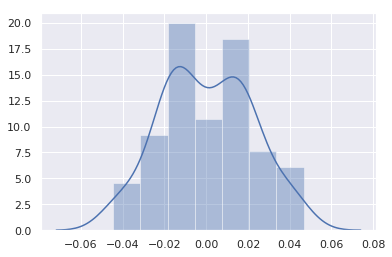

In [337]:
# Creating our null distribution bootstraps for each sample
boot_X = np.random.choice(Sample_X_null, size=(len(Sample_X_null),100000), replace=True).mean(axis=1)
boot_Y = np.random.choice(Sample_Y_null, size=(len(Sample_Y_null),100000), replace=True).mean(axis=1)

# Then creating the boostrap distribution of the mean differences
boot_diff = boot_Y - boot_X

# Visualizing the differences distribution
sns.distplot(boot_diff)
plt.show()

The p-value then is the probability of getting a means difference more extreme than what we observed. As such, we'll need to first calculate that (which is the difference between the sample means).

Then we simply ask what proportion of the distribution is more extreme than this value (here, in a two-tailed fashion).

In [338]:
# Find the observed difference between the sample means
observed_diff = abs(Sample_Y.mean() - Sample_X.mean())

# Calculate the p-value
# Here we ask (number of differences more extreme than observed / size of distribution) to get this
p = ((boot_diff > observed_diff) + (boot_diff < -observed_diff)).sum()/len(boot_diff)
p

0.0

And as such we got a p-value of 0. This is not impossible in bootstrapping if the difference is very strong and significant. We might have to emulate many many more samples for the null value to show up in the distribution at all if it has such a low chance.

In this case though, let's run a t-test to see if the p-value agrees.

In [339]:
# Checking via a t-test
stats.ttest_ind(Sample_X, Sample_Y)

Ttest_indResult(statistic=-17.79085329920223, pvalue=6.2908007458173654e-43)

Indeed the t-test also finds the p-value to be almost 0. It would be extremely rare to find the observed means difference if the two samples were randomly drawn from the same distribution.

### Permutation Resampling (Resampling WITHOUT replacement) <a name="permutation_resampling"></a>

Unlike bootstrapping, permutation resampling works ***without*** replacement. It works by asking what proportion of the possible combinations (if our two samples were actually from the same population) would allow for us to see the observed difference. Note the expectation of two samples here.

Mechanically this is similar to a bootstrap except that a permutation resample pulls form the combination of both samples (without replacement). In doing so, it effectively gives us a sense of how "exchangeable" the two sample's values are when presuming they are. By pulling from the pooled version of both samples together, permutation resampling emulates the null distribution directly.

**Again let's use `Sample_X` and `Sample_Y` as our given...**

**Null Hpothesis:** The two samples are drawn from the same distribution.

**Alternative Hypothesis:** The two samples are drawn from different distributions.

We begin by pooling together both samples into a combined sample so we can emulate the null distribution.

In [0]:
# Combining both samples
combined_samp = np.concatenate((Sample_X, Sample_Y))

Then we resample from the combined sample similarly to Bootstrapping. At each draw, we emulate two samples by splitting our draw. We then calculate the means of each emulated sample, subtract them, and append that to our distribution of resampled mean difference.

While ideally we would calculate the probability out of all possible combinations, that number can be exorbitantly large, and as such we can employ random resampling to estimate this instead.

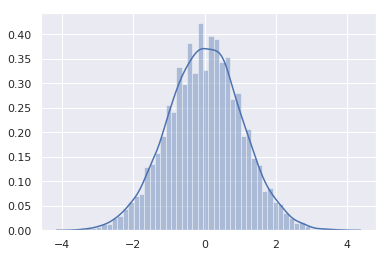

In [341]:
# Creating a variable for our resampling distribution to be stored in
resamp_diff=[]

# "Without replacement" means the size value has to be no larger than the sample, so we loop
for i in range(10000):
  # Create our draw from the combined sample
  resamp = np.random.choice(combined_samp, size=len(combined_samp), replace=False)
  # Split that draw in half to create two emulated samples
  X, Y = np.split(resamp, 2)
  # Calculate the emulated sample means and tack those on to our difference of means distribution 
  resamp_diff.append(Y.mean() - X.mean())

# Converting this to a numpy array for convenience functions (like .sum)  
resamp_diff = np.asarray(resamp_diff)    

# Visualizing the distribution
sns.distplot(resamp_diff)
plt.show()

We of course get a distribution centered around 0, as the null distribution is the case that the samples come from the same population (and we would expect their mean differences to be 0).

To calculate p values, we ask this distribution what proportion of its values (and thus probability) allow for a value more extreme than our alternative hypothesis.

First we calculate our observed test statistic to compare it to, in this case the difference in means.

In [342]:
obs_diff = Sample_Y.mean() - Sample_X.mean()
obs_diff

11.490000000000002

For an alternative hypothesis where we wanted to know if one of the groups was larger, we could do:

In [343]:
# p-value one-tailed
(resamp_diff > obs_diff).sum()/len(resamp_diff)

0.0

And for an alternative hypothesis that the two samples are not equal:

In [344]:
# p-value two-tailed
((resamp_diff > obs_diff) + (resamp_diff < -obs_diff)).sum()/len(resamp_diff)

0.0

Both of these come to 0 suggesting an extremely low (nonexistant) probability of getting a difference of means this extreme if the null hypothesis were true. This is not impossible in resampling methods, but let's check it by a t-test.

In [345]:
stats.ttest_ind(Sample_X, Sample_Y)

Ttest_indResult(statistic=-17.79085329920223, pvalue=6.2908007458173654e-43)

The t-test agrees that the probability is effectively 0. It might take running an unrealistic number of iterations for the null value to show within the distribution if the differences are very significant.

## Wilcoxon Rank Sum Test (Mann-Whitney-U) <a name="MWW"></a>
**Note: This test has multiple names which are more or less equivalent. It was originated as the Wilcoxon Rank Sum Test with a "W" statistic but the expanded on to be more robust by Mann-Whitney as a "U" statistic. For independent samples, these two tests are generally equivalent and U ~= W. For more details you'd have to check the documentation in the language used. As such this is often calle dthe "Mann-Whitney-Wilcoxon" (MWW).**

The MWW test takes advantage of the concept of ***ranking*** data to compute a W statistic and hypothesis test two sample regarding the difference in their **medians** (as opposed to means).

It can be used as an alternative to a two-sample t-test when samples are small (though generally greater than 10) and the distributions are nonnormal.

When ranking data in a statistical setting, the data from both samples are combined before ranking. The ranks for ties are then averaged.

In the test either a W statistic (in the case of the Wilcoxon Rank Sum Test flavor) or a U statistic (in the case of the Mann-Whitney-U flavor) is used. In either case, this statistic is related to the smaller of the two sum of ranks calculated between either sample. This statistic is then generally follows the normal distribution for large enough samples (n>20), but may need be compared to tabulated values for smaller samples.

The MWW test is less powerful than some parametric tests (and does not require a normal distribution), but still does make some assumptions:
* The two samples come from similar distributions (regardless of what that distribution type actually is)
* The two samples are independent

There are two implementations in Scipy:
 * `ranksums` - This tests the alternative that samples are drawn from different distributions (it defaults to two-tailed). It **does not handle ties** in ranks however.
 * `mannwhitneyu` - Similar to `ranksums` but handles ties, allows for continuity correction, and allows for for setting the alternative. Only appropriate when sample size (for each) is greater than 20.
 
Note that other languages may have different implementation as there is no unified language for these tests in the literature. Simply check the docs.
 
Let's demonstrate both on `Sample_Ages_A` and `Samples_Ages_B`.


First `ranksums`. Again here the hypothesis is one-tailed (one sample has values generally greater than the other).


In [346]:
# Wilcoxon rank sum, two-tailed
stats.ranksums(Sample_Ages_A, Sample_Ages_B)

RanksumsResult(statistic=-3.6661527595475376, pvalue=0.0002462268742937743)

In [347]:
# Mann-Whitney-U version, two-tailed
stats.mannwhitneyu(Sample_Ages_A, Sample_Ages_B, alternative='two-sided')

MannwhitneyuResult(statistic=218.0, pvalue=0.00024107831295968165)

We can see that the two versions generally agree. The `mannwhitney` version however returns the U statistic whereas the ranksums returns (I believe), the zstat (even though the test is based on the W statistic).

## Wilcoxon Signed Rank <a name="wilcoxon_signed_rank"></a>

The Wilcoxon Signed Rank test is similar in mechanics to the Wilcoxon Rank Sums test (or Mann-Whitney-Wilcoxon), except that it is intended for **paired (dependent)** samples. That is, it can be thought of as a nonparametric alternative to the paired t-test.

Scipy has an implementation of this via `wilcoxon`. It mainly functions by testing whether the differences in two samples are symmetric about 0, testing against the null hypothesis that the samples are drawn from the same distribution.

One particular concern for this test is that of discrete values. Since the test has interest in differences symmetric about 0, discrete data will create many differences right at 0, which will cause that data to effectively discarded in the test. The Scipy implementation has a parameter `zero_method` to how to handle this (for instance, there is a conservative correction called "pratt"), but it defaults to discarding all zero differences. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) for more details.

Implemented on `Sample_X` and `Sample_Y` below with the alternative that the samples are drawn from different distributions.


In [348]:
# Wilcoxon Signed Rank Test
stats.wilcoxon(Sample_X, Sample_Y, alternative='two-sided')

WilcoxonResult(statistic=84.5, pvalue=6.929359201437752e-17)

The statistic returned is the sum of ranks of differences (different depending on tails of test, see docs), but the p value can be interpreted as normal.

## Kruskal-Wallis <a name="kruskal_wallis"></a>

The Kruskal-Wallis test is another rank-based test and indeed an extension of the Wilcoxon rank-sum test to 3 or more groups. It tests against the null hypothesis that all groups are drawn from the same distribution. As such, it asks if there is a statistical difference for any sample within the groups of data. This makes it a nonparametric option for a one-way ANOVA.

The Kruskal Wallis test uses a statistic called "H" which can be compared to a chi-squared distribution assuming all sample sizes are at least 5. The degrees of free is one less than the number of groups. Like other rank-based tests, this generally asseses differences in the median rather than the mean.

Like ANOVA it only tests if any of the samples are different and doesn't tell you *which* is different. As such, post-hoc tests are required to parse this (see the ANOVA section for details).

Scipy has an implementation `kruskal` for this.

Let's implement this to see if any of the samples A, B, X, or Y come from a different distributions.


In [349]:
# Implementing the Kruskal-Wallis test
stats.kruskal(Sample_Ages_A, Sample_Ages_B, Sample_X, Sample_Y)

KruskalResult(statistic=168.9333362702433, pvalue=2.1624109033349305e-36)

The p-value is quite small indicating we have statistical evidence that at least one of the samples within the group is different from the others.

# Categorical Analysis <a name="categorical"></a>

Most of the previously mentioned parametric or nonparametric tests were appropriate for quantitative data, but statistical tests also exist for categorical data including nominal data (categorical data with no ranking like "apples," "oranges," etc. or yes/no) and ordinal data (categorical data with inherent rankings like "disagree", "neutral", "agree" etc. or discrete rankings).

Numerical metrics (like mean) don't make sense for categorical data, so different methods are employed. For instance, visualization is often done through tables such as a **contingency table** (which displays the number of observations in each category) or stacked bar charts. Accordingly, different statistical tests are also used, many taking in contingency tables as inputs.

Let's create two Contingency Tables for use in the later-following tests. In Python, these can generally be set up as n-dimensional arrays.

For the scenarios below, let's simply assume we have three possible Samples (A, B, and C) which can result in outcomes "Yes" or "No".

In [350]:
# Creating arrays to be used
# Rows are samples, columns are yes/no
two_by_two = [[60,9], [11,73]]
three_by_two = [[60,9], [11,73], [8,54]]
# We may not use three_by_two here, but calculated just in case

# Also creating a dataframe just to visualize
df = pd.DataFrame(data={'Sample':["A","B","C"], 'Yes':[60,11,8], 'No':[9,73,54]})
df

,Sample,Yes,No
0,A,60,9
1,B,11,73
2,C,8,54


## Fisher's Exact Test <a name="fishers"></a>

**Note: Not to be confused with the F-test which is used in Analysis of Variance.**

Fisher's Exact test is a method for calculating the exact p-values for contingency tables. While generally it is used for a 2x2 grid contingency table, the methodology may be expanded to larger grids (though the programming package implementation may or may not allow it).

Fisher's exact tests ask how unusual the contingency table is given the null hypothesis that the proportions it contains are the same. The probability  is calculated from the [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution). Noteably the test works on comparing the proportions of the groups in the grid and rejects the null if the proportions are more extreme than the null value (or that the proportions are the same). One-tailed tests are also still possible, and in doing so for greater or less than, you are generally comparing the proportions top->down or left->right (see this [post](https://stats.stackexchange.com/questions/307891/which-ratios-are-being-compared-in-fisher-exact-test) for more details). It is also worth noting that (given the hypergeometric distribution) in this case, the one tailed p-values for greater and less do not follow the standard behavior (for instance, one could be 1.0 and then other still nonzero). Since the distribution is symmetric, you also can not multiply a one-sided p-value by 2 to get the two-tailed value.

Importantly, Fisher's test assumes that both "margins" (the row and column totals) are fixed by the experiment, which is often not true of both the row and columsn simultaneously in many cases. Still, Fishers is generally prefered for small samples over competing tests (like Chi-Squared) and is otherwise valid for larger samples (though the use of factorials on the back-end increases complexity of computation).

Let's ask if the probability of getting Yes or No on Sample A is the same as that in Sample B. That is:


**Null Hypothesis:** $p_a = p_b$

**Alternative Hypothesis:** $p_a \ne p_b$

Scipy has a 2x2 grid implementation of Fisher's. For higher dimensionality you would have to use Python. Let's implement it on our `two_by_two` grid previously created.

In [351]:
# Implementing Fisher's Exact Test
stats.fisher_exact(two_by_two, alternative='two-sided')

(44.24242424242424, 2.6203125588777274e-21)

This returns the calculated odds ratio (?further clarity needed here?) of the groups and the p-value. In this case, we can see the p-value is easily below any alpha level, and so we reject the null and find evidence that the proportion of the samples are significantly different.

## Chi-Square "Goodness of Fit" Test  <a name="chi_square_fit"></a>

While the Chi-Square test can serve as an alternative to Fisher's Exact test (particularly for large samples), it is often discussed first as a "goodness of fit" test when used on one variable. As such, it can be used to test against significant deviation from many theoretical distributions.

This utility can mainly be seen when calculating the Chi-square test statistic. This is found by finding the differences between the observed and expected values, squaring them (to get rid of negatives), diving this by the expected value, and then summing each of these calculated values together. This Chi-Square statistic can then be compared to a chi-square distribution similar to many other statistical tests. For a 1 variable, categorical goodness of fit test, the degrees of freedom is k - 1, where k is the number of levels of the categorical variable.

The chi-square distribution is not a symmetric distribution, so it is always "one-sided."

Due to its availability as a goodness of fit test, the Chi-square test is often implemented in various other statistical methods also. Regardless, for this version of the test, the expected distribution must be specified directly.

For instance, say the expected values of our created `two_by_two` grid for sample A were actually twice that which we observed.

In [412]:
# Creating a variable for our sample A distribution
A_observed = two_by_two[0] # Pulling from our previously created grid
A_observed

[60, 9]

In [414]:
# And a variable for what was expected
A_expected = [i * 2 for i in A_observed]
A_expected

[120, 18]

We can run a Chi-square goodness of fit test to test against the null hypothesis that the data is consistent with our specified distribution.

Scipy has two implementations of Chi-square-- one that takes in the observed and expected values (chisquare), and one that takes in a contingency table (chi2_contingency). The former is used for goodness of fit tests (and other cases whether the expected values are provided), and the later we'll use later.

We'll run the former on our data below.

In [415]:
stats.chisquare(f_obs=A_observed, f_exp=A_expected)

Power_divergenceResult(statistic=34.5, pvalue=4.262513224869198e-09)

As expected, we get a low p-value, low enough to reject the null hypothesis that the observed data is consistent with the expected distribution.

## Chi-square Independence/Homogeneity Test <a name="chi_square_multvar"></a>

When the Chi-square test is generalized to more than one variable, it can emulate the same intention as Fisher's exact test. Chi-square has the advantage of being less computationally arduous and thus often preferred for larger sample sizes (rule of thumb, all cell counts at least 5). Chi-square is also generally preferred over Fisher's for grids larger than 2x2 due to computation complexity.

Unlike Fisher's test, the Chi-square test works by comparing the observed cell values in the grid to calculated "expected" values (representing the values under the null), as was noted previously regarding Chi-square generally. In the case of a contingency table, it is possible we are testing against a null of a known set of expected values. If so, we would use a function like the `chisquare` one used above. The expected values would then arise in a matter specific to the test or experiment.

However, for multivariable chi-square tests, we often don't have a known expected distribution we are testing against. In such cases, the Chi-square test is then said to either test for **independence** (that the variables are independent-- they have no relation to each other) or **homogeneity** (the samples were drawn from the same population), though the math is identical.

The **independence** case is more appropriately stated when two or more variables are compared within a single sample. This then tests whether the two variables are associated or not. More specifically:
* **Null Hypothesis:** The two variables are independent. There is no relationship between the variables.
* **Alternative Hypothesis:** The two variables are not independent.

The **homogeneity** case is more appropriately stated when a sample is taken from two or more populations. This then tests if the distribution of one variable is the same across all categories of the other variable. More specifically:
* **Null Hypothesis:**  The distribution of one variable is the same across all categories of the other variable. I.e. the samples were drawn from the same population.
* **Alternative Hypothesis:** There is a difference in distribution for at least one category.

Again, the math and calculated p-values are the same. Only the interpretation differs.

We still need expected values to run either case however. These values (for either independence or homogeneity assumptions under the null) can be found for each cell by multiplying the row total by the column total and then dividing by the overall total for the grid. The differences between the observed and expected can then be used to compute the Chi-square test statistic.

For any such contingency table, the degrees of freedom used then are (r-1)(c-1) where r is number of rows and c is number of columns (so for a 2x2, df =1).

In such a you can only tell that the comparison is significantly different, but you can't tell which group is "more" than the other.

Let's again ask if the probability of getting Yes or No on Sample A is the same as that in Sample B. That is:

**Null Hypothesis:** $p_a = p_b$

**Alternative Hypothesis:** $p_a \ne p_b$

Since we do not have an expected set of values to compare it to, we'll use `chi2_contingency` which will compute the expecting values for us while completing the test.


In [352]:
# Implementing the chi-square test
stats.chi2_contingency(two_by_two)

(80.1529602455667,
 3.4651913185253876e-19,
 1,
 array([[32.01960784, 36.98039216],
        [38.98039216, 45.01960784]]))

The outputs include the chi-square value, the p-value, and the expected values as an array of arrays. As we can see, while producing a somewhat different p-value, the Chi-square test agrees with Fishers in terms of a significant difference being found.

We can expand the same test to a 3 x 2 grid by including our values for Sample C, as seen below.

In [353]:
# The chi-square test for larger than 2x2 can be implemented the same way
stats.chi2_contingency(three_by_two)

(110.22210269655645,
 1.1629860557628403e-24,
 2,
 array([[25.35348837, 43.64651163],
        [30.86511628, 53.13488372],
        [22.78139535, 39.21860465]]))

## Risks and Odds Ratios <a name="risk_odds_ratios"></a>

Another useful means of considering categorical data is the effect or strength of two exposures or treatments to their outcome. This can be analyzed handily on a contingency table modeled as an exposure (typically rows) vs outcome (typically columns) table. Two commmon metrics can then be reported-- the **relative risk ratio** ($\widehat{RR}$) and the **odds ratio** ($\widehat{OR}$).

If our exposure/outcome table is:

In [354]:
df = pd.DataFrame(data={'Exposure/Treatment':["Exposure_1","Exposure_2"],
                        'Outcome_1':["a","c"],
                        'Coutcome_2':["b","d"]})
df

,Exposure/Treatment,Outcome_1,Coutcome_2
0,Exposure_1,a,b
1,Exposure_2,c,d


Then $\widehat{RR}$ = $R_1$/$R_2$, where:
* $R_1$ = a / (a+b)
* $R_2$ = c / (c+d)

This is gives the relative risk ratio which shows the relative probability of a particular outcome (in this case, the first one) occuring for the two exposures. A **risk** is the probability of the outcome occuring. A relative risk of 1 would means the estimated risk of outcome is the same in the two groups.

Also, then $\widehat{OR}$ = $O_1$/$O_2$, where:
* $O_1$ = a / b
* $O_2$ = c / d

**Odds** describe the ratio of the probability that an event occurs to the probability that it doesn't occur. Again, an odds ratio of 1 means the estimates odds of the outcomes are the same in the two groups.

Generally risk ratios are preferred as they are more easily understood by most. However, the risk ratios are not appropriate for case-control studies (since the margins are conditioned on the experiment) or some more complicated data analysis. Odds may also show up more as part of other statistical tests (for instance, Fisher's and logistic regression).


# Principal Component Analysis <a name="PCA"></a>

Principal component analysis (PCA) is a form of dimensionality reduction that seeks to maximize data variability along as few "components" as possible. These "components" are, in effect, newly created variables that aim to capture the variability across multiple variables. As such, rather than simply dropping variables/columns outright, PCA effectively "merges" the variability across multiple variables into new "componenets". Then the components explaining most of the variability in the data are the only ones kept.

PCA accomplishes this by means of projecting the data along the direction/dimension that captures the most variability. Another way to think of this is that of rotating the data into new dimensions so that we capture as much of it as we can in as few axis as possible.

If we imagine a 3-variable dataset as a 3-dimensional cube, we could imagine rotating that cube until most of the variability of the data aligns along some axis (supposing we drew one for reference). This newly created "axis" is a principal componenet (PC) of the dataset and captures more variability than any of the original xyz axis individually. In fact, this new axis becomes our "1st" PC as it captures the most variability. We could then draw two more axis orthogonal to our 1st PC which then represent the remaining PCs of the dataset (one PC possible for each original dimension of the data). Each of these PCs then is comprised of information from each of the original xyz axis but captures the variability at a different rate. Then, if the first two PCs capture a satisfactory amount of the variability of the data, the remaining one may be dropped without losing much information from the data.

By reducing the number of dimensions while minimizing information loss, we create a convenient option for running regression, machine learning, or other such methods (for instance, imagine running a machine learning classifier on 15 PCs instead of 400 variables). The newly created PCs, however, do lose some interpretability as each is formed from information inherrent to all of the original variables, though some methods exist to interpret the "meaning" of each PC (for instance by viewing the effecting weighting of each original variable's contribution to the PC). Conveniently also, the resultant PCs of the data can be considered statistically independent of each other (though we skip on the theory behind that here).

The means of calculating each PC rely on matrix operations from linear algebra, so we need a couple of terms:
* **Eigenvectors** - An eigenvector is a vector (a 1D matrix) such that, when you multiply the vector by a matrix, you get a scaled version of that vector (a scalar multiple) as the result. For instance, if $A$ is a matrix, $v$ our eigenvector, and $\lambda$ some scalar value, then the following statement is true: $Av = \lambda v$.
  * In the case of PCA, the eigenvectors will represent, effectively, the values needed to transform our original data into the principal components. They indicate a "direction" in the dimensional space of the data.
* **Eigenvalue** - In the above case, the eigenvalue is the scalar value ("$\lambda$" above).
 * In the case of PCA, the eigenvalues represent the amount of variability corresponding to the direction represented by a particular eigenvector.
 
The eigenvectors are calculated off of the correlation (or sometimes, covariance) matrix of the dataset, wherein there are only as many eigenvectors possible as the maximum dimensions of the correlation matrix. The largest eigenvalue tells us which eigen vector to use to calculate the first principal component, the second largest eigenvalue tells us which vector for the second principal component, and so on.

Since Python and other statistical packages can do most of the work for us, we'll leave the mathematical description at that and just follow the main steps below to be able to follow along with the code. For more info, check out this [handy post](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

Algorithmically, the process looks like:
* 1) Separate out the independent variables (call X) and dependent variable (call Y) in your data set.
* 2) Center your data in X at 0 for each column (for each variable, subtract its mean from each data point within that column).
* 3) Standardize your X data (or not). PCA is effected by data being on different scales (since the variables are all combined into the new components). Unless your data is on similar scales and you really care about the differences in variability between individual variables, you should probably standardize it. Do this by dividing by the standard deviation for each variable.
* 4) Create the covariance matrix (if you didn't standardize) or correlation matrix (if you did standardize) of your X.
* 5) Find the eigenvalues and eigenvectors of your correlation (or covariance) matrix. This is done through a technique called "eigen decomposition" (or "spectral decomposition"), but typically you rely on software for this.
* 6) Sort the eigenvectors in descending order in such that those with the highest eigenvalue come first. (Remember that the highest eigenvalue represents our first principal component and corresponds with the vector/direction capturing the most variability).
* 7) Calculate our new data (of principal components) using our ordered matrix of eigenvectors. This is done by multiplying our sorted eigenvector matrix by our centered (and maybe/maybe-not standardized) X.
* 8) Determine how many of the principal components to keep. This can be done arbitrarily, by taking the first few that capture a certain percentage of variability (an easy option via software), or by reviewing a **scree plot**. A scree plot is a plot of each principal component denoting what percentage of variability each component captures. Typically the scree plot is reviewed for an inflection point in the data (or where the amount of variability contained drops sharply), and all other components past this are dropped.

Many of the above steps are combined in the Python workflow when utilizing the Scikitlearn library. We'll walk through the process of PCA on a very simple database below (the "Iris" dataset). Note that the Iris dataset already has only a few columns, so there's little need for PCA on it pragmatically, but we use its simplicity for instruction.

First let's grab the data in a Pandas dataframe.





In [355]:
# We're pulling in the dataset without from a source without column names, so adding those manually here
col_names = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm', 'Species']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Next we'll separate our independent and dependent variables.

In [0]:
# We'll call our independent variables (our features) X
X = df.loc[:, 'SepalLengthCm':'PetalWidthCm']
# And our dependent (our target) Y
Y = df[['Species']]

Arguably here we might not need to standardize our data as the variables are on the same scale and we might be interested in the variability. Often we *will* standardize the data however, we'll do it here for the educational value.

In [0]:
# We first instantiate a StandardScaler object from ScitKitlearn, and then transform the data with it
X_standard = StandardScaler().fit_transform(X)

Next we can take advantage of Scikitlearn's `PCA` class to do most of the dirty work for us. This, when applied to the data through the `fit_transform()` method handles the calculation of the correlation or covariance matrix, the finding of the eigenvalues and eigenvectors, their sorting, and the conversion of our old data into principal components.

A few notes on this:
* `PCA` does handle centering the data (subtracting the means from each variable) so that step is not necessary, however it does not standardize the data (hence why we did it earlier).
* This then natively only runs PCA on the covariance matrix. However, if we standardize our data first (as we did), this causes it to be the same as if it were running PCA on the correlation matrix (as is often the desire).
* Perhaps the most important parameter is `n_components` whereby you may feed the number of principal components to keep. There are a few main ones but:
  * It can be an integer (up to the number of original variables).
  * It can be a decimal between 0 and 1. In this case, this means that it should keep as many principal components needed so as to encapsulate that percentage of the variance within the data (i.e. `n_components` = 0.95 means as many components as needed to explain 95% of the variance in the data).
  
We're going to keep all of the components here so we can look at a scree plot.


In [0]:
# Instantiating the PCA class
pca = PCA(n_components=4)
# Creating the new data off of the old
principal_components = pca.fit_transform(X)
# Creating a new data frame to house the new data
labels_pc = ['PC1','PC2','PC3','PC4']
df_pca = pd.DataFrame(data=principal_components,
                      columns=labels_pc)
# Joining with our targets
df_pca['Species'] = df['Species']

And view the results.

In [359]:
df_pca.head()

,PC1,PC2,PC3,PC4,Species
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


As it stands, this currently isn't helpful to us as we haven't actually reduced the number of dimensions. We could have done this in the `PCA` call, but maybe we want to fine tune this. To do so, we can take advantage of the `explained_variance_ratio` attribute of the `PCA` transformation to visualize a scree plot. The model fits to the data the moment you call `fit_transform()`, so we call this attribute on the `PCA` object itself and not the transformed data.

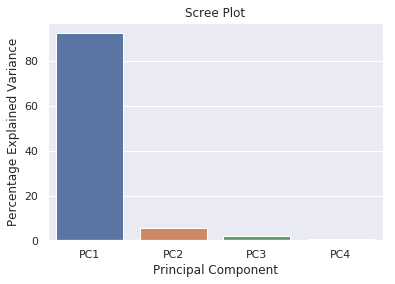

In [360]:
# Creating a scree plot from our transformation
var_percentages = pca.explained_variance_ratio_ * 100
sns.barplot(x=labels_pc, y=var_percentages)
plt.title("Scree Plot")
plt.ylabel("Percentage Explained Variance")
plt.xlabel("Principal Component")
plt.show()

From this we can see that nearly all of the variation in the data can be explained by just the first principal component. The second PC provides some, but after that we're gaining very little information. As such, we could reasonably (albeit arbitrarily) drop our dataset down to the first two principal components and then run some machine learning algorithm or regression on just those two.

There are also a few other methods/rules-of-thumb on how many components to retain:
* **Kaiser's criterion** - Keep all principal componenets with an eigenvalue greater than 1
* **Percent Variance Explained** - Like noted above, keep all principal components in such that you account for a certain percentage of the variance within the data
* **Elbow method** - Look at the scree plot and find the "elbow" which is the point where the percent variance explained drops the most and discard all components to the right of that.

We might also try and interpret each principal component to get a sense of what they "mean." One way to do this is to look at the eigenvector for each PC. The eigenvector items then represent the weighting of each variable comprising the principal component (for instance $PC1 = eigenvector1_1(Variable1) + eigenvector1_2(Variable2)$...). One could also create a PC **loading plot** which plots the weight of each input variable against a pair of principal components. Or one could create a correlation matrix between the the original data and the principal components (this correlation called **factor loading**). In either case, it must be understood that each principal component is comprised of a contribution from all the variables and as such can not be thought of as "one thing."

# Regression <a name="regression"></a>

For regression, I have my own hand-written notes in a separate place, so we'll focus on the code and perhaps a few other concepts here.

Since we were working with the iris data set earlier, let's bring that back in again. However, let's add to it with some fake categorical data to play with for categorical and logistic regression. The below additions are fairly made-up and arbitrary. We'll also add in a random numeric value so that we expect one variable to have no relationship within the datset.

Note that some of our models below might break a few assumptions required by regression to be used, but we're simplifying out these concerns at least initially so we can provide some examples.

## Data setup <a name="regression_setup"></a>

In [361]:
# Setting up the dataframe as an ammended version of the iris data frame

# We're pulling in the dataset without from a source without column names, so adding those manually here
col_names = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm', 'Species']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)

# Let's create some categorical values to pull from
Cat1_list = ['pointy', 'smooth', 'twisted']
Cat2_list = ['round', 'square', 'triangle']
Cat3_list = ['dark', 'light']

# Let's add in the Cat1 values randomly
df['Cat1'] = np.random.choice(Cat1_list, size=len(df))

# Let's associated associate Cat2 with with values on our target
df['Cat2'] = np.nan
df.loc[df.Species == "Iris-setosa", 'Cat2'] = "round"
df.loc[df.Species == "Iris-versicolor", 'Cat2'] = "square"
df.loc[df.Species == "Iris-virginica", 'Cat2'] = "triangle"
# But add a little noise so it's not perfect
random_rows = np.random.randint(0, len(df), size=15) # 15 is about 10% of the data
for i in random_rows:
  df.loc[df.index[[i]], 'Cat2'] = np.random.choice(Cat2_list)
  
# And let's associate Cat3 with some values of Sepal Length
df['Cat3'] = np.nan
df.loc[df.SepalLengthCm <= 5.5, 'Cat3'] = "dark"
df.loc[df.SepalLengthCm > 5.5, 'Cat3'] = "light"
# And again add some noise (about 10%) so it's not perfect using our random_rows
for i in random_rows:
  df.loc[df.index[[i]], 'Cat3'] = np.random.choice(Cat3_list)
  
# Add in a variable that's just random and unnassociated with the dataset
df['RandVar'] = np.random.choice(np.arange(0,6,0.3), size=len(df))

# Finally let's view our df  
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cat1,Cat2,Cat3,RandVar
0,5.1,3.5,1.4,0.2,Iris-setosa,smooth,round,dark,1.5
1,4.9,3.0,1.4,0.2,Iris-setosa,twisted,round,dark,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,twisted,round,dark,3.6
3,4.6,3.1,1.5,0.2,Iris-setosa,smooth,round,dark,4.5
4,5.0,3.6,1.4,0.2,Iris-setosa,pointy,round,dark,1.5


We can look at a pairplot of the data to get a sense of which variables might be nice to do linear regression on.

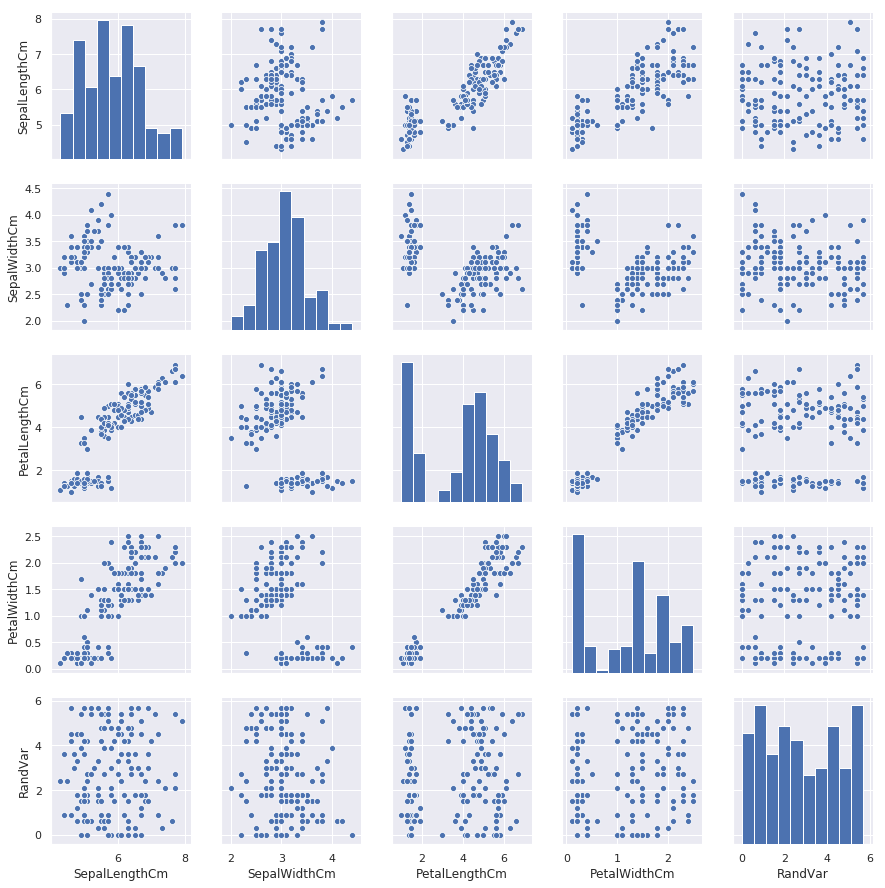

In [362]:
# Visualizing a pairplot of our dataframe
sns.pairplot(df)
plt.show()

A lot of candidates here, but petal length and petal width look like they have a nice linear relationship.

We could also see this through a correlation matrix.

In [363]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,RandVar
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.066576
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.152973
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.124558
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.131504
RandVar,0.066576,-0.152973,0.124558,0.131504,1.000000


Here we also see the strong correlation between petal length and petal width, but there are other oppotunities as well.

## Regression in Python <a name="regression_python"></a>

Before we try out a simple regression, it's worth considering the different options Python has available. The simplest and generally common functions to use are those in ScikitLearn or StatsModels.

SciKitLearn had some speed advantages over Statsmodels. It also has the advantage of using function methodology similar to its machine learning algorithms.

Statsmodels has more statistical options within its overall framework, but its base ordinary linear regression function `OLS` is more or less equivalent with that of ScikitLearn's. However, newer versions of Statsmodels have allowed for the implementation of formulas for regression models similar to those in R-programming via separate versions of some Statsmodels regression functions.

These versions are found in the `formula` module of Statsmodels (so here `sm.formula`) and are usually written as lower-case versions of the original (So the one for `OLS` could be accessed by `sm.formula.ols`). They come with a number of advantages. For instance, formulas can take care of categorical variable encoding for you. Using these formulas it's also easier to run regression on things like interaction terms or polynomials as you can utilize write these into the formula directly (in the `OLS` version, you must directly create that data within your dataset). Additionally, formulas automatically handle the intercept (which otherwise would require manually adding a column).

For the above reasons, we stick with Statsmodels new formula implementations here when possible.

The formulas themselves generally look like `'Dependent_variable ~ Independent_Variable_1 + Indepdent_Variable_2 ...and so on...'`. Note the use of the ~ symbol to separate the variables (as if an equal sign). More complicated formulas can also be made and will be addressed ad-hoc below, but the documentation can be found [here](https://www.statsmodels.org/dev/example_formulas.html).

## Ordinary Linear Regression <a name="ols"></a>

Let's try out a simple example of ordinary linear regression on `PetalLengthCm` and `PetalWidthCm`. As noted above, we'll use Statsmodels formulaic implementation

The general form is to first create a model based on our formula, fit the model, and the print the results.

In [364]:
# Setting up our ols model
lin_model = sm.formula.ols(formula='PetalLengthCm ~ PetalWidthCm', data=df)
# Fitting the model. This new object will contain all the pertinent information about our results
results = lin_model.fit()
# This comes with a handy method .summary() to print a bunch of useful information about our model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           5.78e-86
Time:                        14:03:19   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0906      0.073     14.951   

The results summary provides a number of handy statistics about our model-- likely more than we will typically need, but we can review a few below:
* The "coef" colum tells us that our formula (in y=mx+b form) is `PetalLengthCm = (2.2259)(PetalWidthCm) + 1.0906`.
* The "t" and "P>|t|" columns refer to a t-test where the null hypothesis is that the population parameters for the slope or intercept are 0 as a two-tailed test (so the first is the t statistic, the second the p-value). Here if the p-value is higher than our alpha, we fail to reject the null hypothesis, thus meaning we do not have sufficient evidence to believe a statistically significant linear relationship (on these parameters) exists.
 * In such a t-test, the distribution degrees of freedom is equal to n - k, where n is the sample size and k the number of regression parameters.
* The [0.025 0.975] referes to our 95% confidence interval.

We might now want to plot our data against the regression line to visualize this. Statsmodels doesn't have graphing capabilities near as simple as Seaborn, so we're going to build our line by formula and then overlay the data.

We can access our coefficients programmatically via the `params` attribute of our results.

In [365]:
# Creating variables for our slope and intercept
b = results.params.Intercept
m = results.params.PetalWidthCm
# To plot a regression line, we really only need two points
# So let's just use the min and max x values in our dataset for our new x's
x_predicted = np.array([df.PetalWidthCm.min(), df.PetalWidthCm.max()])
# And then we use our formula to create our y values
y_predicted = (m * x_predicted) + b
# Printing the coefficients just to verrify they agree with the summary above
print(m, b)

2.2258853065539115 1.0905721458773807


Now we can graph our predicted regression line overlaid with our actual dataset for comparison.

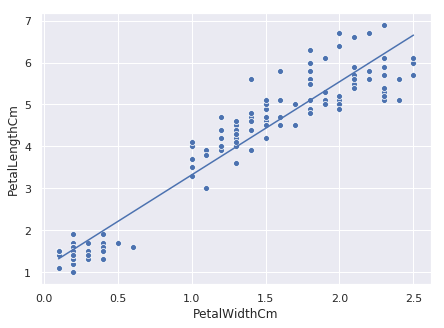

In [366]:
# Visualizing our regression line compared to the data
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x="PetalWidthCm", y="PetalLengthCm", data=df, ax=ax)
sns.lineplot(x=x_predicted, y=y_predicted, ax=ax)
plt.show()

It is worth noting that Seaborn has a function `regplot` that handles the above process all in one go while also allowing the ability to add confidence ranges on the regression line. That is plotted below.

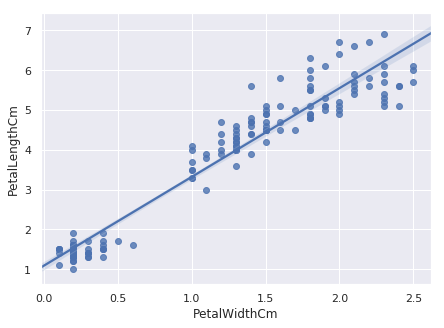

In [367]:
# Seaborn's regression plot function
plt.figure(figsize=(7,5))
sns.regplot(x="PetalWidthCm", y="PetalLengthCm", data=df)
plt.show()

One might wonder why not just use Seaborn's function then given we get the same result. For one, we don't get all of the helpful statistical data and versatility that comes with Statsmodels. Furthermore, at least at time of writing, there is no straightforward way to pull out the regression formula used in this graph programmatically. As such, `regplot` is intended as a quick visualization option, more useful for "eyeballing" the results rather than real model building.

## Multiple Linear Regression <a name="multiple_regression"></a>

Unsurprisingly, multiple linear regression is simply linear regression with more than one variable as a predictor variable. We can use the same function as linear regression here and just add in the other variables.

Let's run a model for `SepalLengthCm` off of a couple of values we already expect to have some correlation to it -- `PetalLengthCm` and `PetalWidthCm` -- but let's also add in a variable we expect to have no relation-- `RandVar`.

In [368]:
# Running our multiple linear regression sepal length
lin_model = sm.formula.ols(formula='SepalLengthCm ~ RandVar + PetalLengthCm + PetalWidthCm', data=df)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.48e-46
Time:                        14:03:19   Log-Likelihood:                -74.560
No. Observations:                 150   AIC:                             157.1
Df Residuals:                     146   BIC:                             169.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2330      0.107     39.540

Interpretting these results works in the same way as does simple linear regression except that now we have multiple slope-like coefficients for multiple variable inputs.

However, now that we have multiple variables, we should recognize that our multiple linear regression results brings us into the territory of ANOVA and F-tests.

For instance, we might consider the following tests:
* An **overall F-test**:  This tests the null hypothesis that **every** predictor coefficient is 0. That is, it tests the null hypothesis that no linear relationship exists between the whole set and the response variable (i.e. like in ANOVA). If we picked our variables reasonably, this is unlikely. A high p-value would effectively mean to scratch the model.
* A **general linear F-test**: This tests the null hypothesis that a given **subset** of our predictor variables is 0. That is, it tests the null hypothesis that there is no significant difference between the model with and without that variable subset dropped. A high p-value would mean we have evidence supporting to drop that subset of variables.
* An **individual t-test**:  This is just as suspected where we are only testing the significance of one variable within the model.

Our results summary already provides us with our F-statistics and it's p-value for the overall F-test in the top right of the table. The p-value here is extremely low, suggesting that at least one of the variables is statstically significant to the model.

We can look at the individual t-test values also directly from the regression results as the "P>|t|" values. As we can see, `RandVar` has an especially high p-value, high enough that at no reasonable confidence level could we reject the null hypothesis that it's coefficient is 0. It would be reasonable to drop this from the model (as we would expect).

For the general linear F-test on a subset of the data however, we will need to create multiple versions of the model with different subsets of the overall. This is sometimes called looking at models that are "nested" within the overall.

In [0]:
# Creating different models containing different subsets of all the variables used
model_A = sm.formula.ols(formula='SepalLengthCm ~ RandVar', data=df).fit()
model_B = sm.formula.ols(formula='SepalLengthCm ~ PetalLengthCm + PetalWidthCm', data=df).fit()
model_All = sm.formula.ols(formula='SepalLengthCm ~ RandVar + PetalLengthCm + PetalWidthCm', data=df).fit()

We can now compare these difference models using F-test techniques. For this, Statsmodels has a handy function `anonva_lm` that returns analysis of variance tables for linear models. Note that running this may result in runtime warnings that are known harmless bugs (and don't affect the results). If one still felt particularly untrusting, know that R has an equivalent function that can be used in the same way.

Order matters when calling this function. For our use case, we'll want to put the model containing all of the variables last and the subset model first. In this way, the model tests the signifiance of adding the *missing* variable to the model.

The easiest way to see this is when performing the F-test with `RandVar` as the missing variable.

In [370]:
# F-test of adding RandVar to the model (RandVar is missing from model_B)
sm.stats.anova_lm(model_B, model_All)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,147.0,23.888836,0.0,NaN,NaN,NaN
1,146.0,23.733707,1.0,0.155129,0.954291,0.330245


We can see here that the p-value is quite high and as such we can not reject the null hypothesis that the coefficient for `RandVar` is 0. Notice that this, in effect, gives us the same result as the t-test value found in the regression results. We suppose then that we could drop `RandVar` from our model.

Let's try a general linear F-test on a subset of the model still containing petal length and width. Remember that for `anova_lm` it is considering the significance of the variables added to the next (overall) model, so we will feed the function a model *without* those two predictors.

In [371]:
# F-test of adding petal length and width to the model (both variables missing from model_A)
sm.stats.anova_lm(model_A, model_All)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,148.0,101.715486,0.0,NaN,NaN,NaN
1,146.0,23.733707,2.0,77.981779,239.855906,7.285019e-47


Unlike the other p-values, this one we can't glean from the regression summary results. However, as expected, the p-value is extremely low, meaning we can reject the null hypotehsis that all coefficients in our subset here of petal length and width variables are 0. That is, we expect at least one of the variables in this subset to be statistically significant to the model. We *don't* know which, and we don't know if both are, but we shouldn't drop out them both out at least.

## Categorical Regression <a name="categorical_regression"></a>

We can also run regression on categorical variables. Since regression expects continuous numerical values, the data must be transformed into a numeric form, generally through the creation of "dummy" variables (where the values are split into different columns and encoded as 0's or 1's). Remember that in dummy-coding, one column will be dropped and act as a "reference" column (I have my own notes on this, but this is effectively due to the need to not create redundant information in the matrix).

Using non-formulaic Statsmodels methods, you would have to create the dummy-coding of your categorical variables yourself. With the formula version, the coding and dropping of a reference is handled automatically.

Let's run an example utilizing the Species feature of our data set to see what this looks like.

In [372]:
# Run a categorical linear regression
lin_model = sm.formula.ols(formula='PetalLengthCm ~ PetalWidthCm + Species', data=df)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1032.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.80e-98
Time:                        14:03:20   Log-Likelihood:                -64.979
No. Observations:                 150   AIC:                             138.0
Df Residuals:                     146   BIC:                             150.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In the case above, we can see that the species value of setosa is dropped as it has become our reference level (this was handled automatically for us via the use of formulas). In this case, the coefficient for the intercept gives us the mean value of the response variable for setosa. The coefficients for the other categorical values then represent the *added* value to the response variable when switching to those categories.

One might then wonder what happens when we add multiple categorical variables to the data, for instance if we used our `Cat3` variable which has values of "dark" or "light."

In [373]:
# Linear regression with multiple categorical values
lin_model = sm.formula.ols(formula='PetalLengthCm ~ PetalWidthCm + Species + Cat3', data=df)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     809.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.89e-98
Time:                        14:03:20   Log-Likelihood:                -61.318
No. Observations:                 150   AIC:                             132.6
Df Residuals:                     145   BIC:                             147.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We can see that statsmodels still handles the dummy coding and drops a value to use as a reference for both `Species` and `Cat3`. As such, "setosa" and "dark" are missing, and both reference to our new reference level. The intercept then takes on the mean for flowers that are "dark" and "setosa." By viewing the coefficients for the other categorical values as an additive value to the response, we can see how we can still interpret our results in the same manner as earlier. That is, the coefficient for versicolor is the added value to the response when switching from "dark setosa" to "dark versicolor," and so on. For further reading, this [stack exchange post](https://stats.stackexchange.com/questions/120030/interpretation-of-betas-when-there-are-multiple-categorical-variables) adds a little extra clarification.

## Regression Diagnostics <a name="regression_diagnostics"></a>

While a regression model may appear to predict the data well at simple glance, it is important to remember that ordinary linear regression makes a few assumptions:

* **Linearity** - A linear relationship actually exists. If so, a plot of the residuals vs the y-value should be randomly distributed about 0.
* **Independence** - Observations are indepedent of one another (not **auto-correlated**). This is often true, but may be of particular concern for time-series data.
* **Normality** - The errors are normally distributed.
* **Homoscedasticity of errors** - The errors possess homoscedasticity. That is, they have equal variance.

It is possible that a regression model appears to "work," but a failure of amongst these assumptions might suggest a difficulty generalizing beyond the dataset. Ordinary linear regression is, however, fairly robust to light violations of these assumptions in so much that a quick visual inspection usually is sufficient.

One more consideration is that of **collinearity** (where multiple variables vary together in the same way) which may results in a mathematically sound prediction, but an unstable model (discussed below).

We'll review running diagnostic checks on each of these below on a simple model from our Iris datset.

First, let's set up a model to use. We do not necessarily aim to address the issues in this model here but simply have some data to run example functions on.

In [374]:
# Creating a model to perform some diagnostics on
lin_model = sm.formula.ols(formula='PetalLengthCm ~ PetalWidthCm', data=df)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           5.78e-86
Time:                        14:03:20   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0906      0.073     14.951   

And now let's plot the model to see how it looks.

Previously we ran similar code to plot our model by creating two points for our linear equation using the coefficients from our model. We can see below that this can be skipped by using the `fittedvalues` attribute of our model results (provided by Statsmodels).

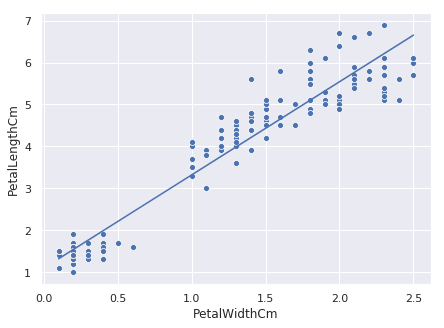

In [375]:
# Visualizing our regression line compared to the data
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x="PetalWidthCm", y="PetalLengthCm", data=df, ax=ax)
sns.lineplot(x=df.PetalWidthCm, y=results.fittedvalues, ax=ax)
plt.show()

The model does appear to predict the data reasonably well. However, we'll continue forward with our diagnostics to see if it possess any particular vulnerabilities.

Statsmodels provides a few handy attributes to grab the residuals of our model as well as a standardized version of the residuals (`resid_pearson`) which will be useful for much of our diagnostics. We've also already seen how to grab the fitted values, we we'll set these up as convenience variables below.

In [0]:
# Setting up some convenience variables for our diagnostics
residuals = results.resid
residuals_standard = results.resid_pearson # This is a standardized version of the residuals
fitted_vals = results.fittedvalues

### Linearity Assumption <a name="regression_linear"></a>

One of the assumptions of our regression process is that the true relationship is indeed linear. If so, we expect a plot of the residuals against each of our predictor variables to show a distribution randomly centered around 0. If the residuals showed some other relationship (such as a curve), we can wager the assumption is broken.

We'll do the residual plot below.

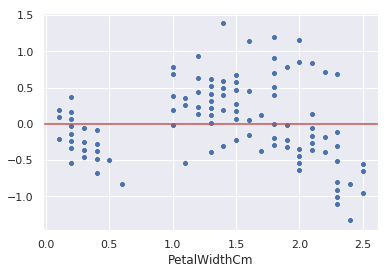

In [377]:
# Plot of residuals against predictor variable
sns.scatterplot(x=df.PetalWidthCm, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

If we had multiple predictor variables, we would run this plot for each of them.

Here it's not so clear that we would pass the linearity assumption as the errors are not obviously distributed about 0. We see this in the apparent clustering on the left and high negative bias on the far right. From the pairwise and correlation plots however, we expect these two variables to have a fairly linear relationship. One explanation may be the presence of different species affecting the PetalWidth's, which our model doesn't account for. As such, we might consider doing more work on the model to make it more generalizable.

In cases where it's hard to evaluate the residuals plot, we might rely on a statistical test. One such is the **Harvey-Collier** test, which Statsmodels does have an implementation of. This function however fails for highly correlated values (as is the case of our two) and as such is commented out below

In [0]:
# Commented out as this function fails for highly colinear predictor/response variables
# sm.stats.diagnostic.linear_harvey_collier(results)

### Independence Assumption <a name="regression_independence"></a>

The independence assumption requires that each observation is independent of the others. For cross-sectional data, this is often true, but we should be especially concerned for longitudinal data such as time-series. If the observations are not independent, we say that **autocorrelation** is present.

One way to address to check this is by plotting the residuals of the model against a longitudinal variable present in the dataset. If you notice a particular trend, you may need to adjust your model to account for it.

Another means of checking this quickly is by the **Durban-Watson** test statistic which is printed by the OLS regression summary. This value has a range from 0 to 4, with 2 representing no auto-correlation expected. Values falling in the range of 1 to 3 (as is in our case) are generally fine for passing the independence assumption.

### Normality Assumption <a name="regression_normality"></a>

The normality assumption asks that our errors be normally distributed. There are quite a few ways to check this.

We could, for instance, do a simple histogram plot of the residuals.

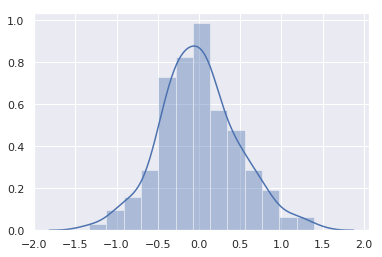

In [379]:
# Histogram plot of the residuals
sns.distplot(residuals)
plt.show()

In our case, the distribution appears quite normal, but this may not always be obvious.

In such cases, we might also consider a QQ plot. When plotting the residuals in this way, it is common to use the standardized version of the residuals. If most of the values fall along the y=x line, we can reasonably expect it to be normal. If there are extreme patterns at any particular part of the plot, we should consider futher investigation.

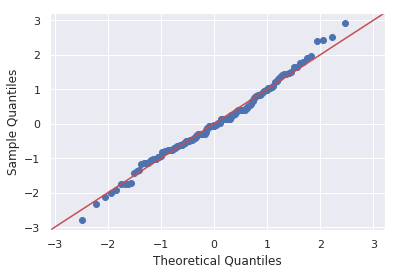

In [380]:
# QQplot of the standardized residuals
sm.qqplot(residuals_standard, line='45', fit=True)
plt.show()

In the QQplot above, it does indeed appear that our residuals are fairly normally distributed.

However, we might also rely on statistical tests for normalcy, many of which are printed in the OLS summary results:
* **Skew and kurtosis** - Values closer to 0 represent normalcy better. Values within +/-2 for either are quite good. Values more extreme than +/-3 warrant inspection, but do not directly invalidate the assumption. In our case, our model has some considerable kurtosis (or "tailedness" in the residuals), but given our other observations, we still consider the normalcy check passed.
* **Omnibus Test** - This is a chi-squared based test where the null hypothesis is that the residuals fit a normal distribution. The "Prob" printed in the summary is the p-value which is high, which fits with our assumption.
* **Jarque-Bera (and other tests)** - Many other tests could also be used, but the summary table prints the Jarque-Bera test. Against this is a test for normalcy, so a high p-value (given by the "Prob" row) gives evidence to continue with our assumption.

When using statistical tests however we should remember that very high sample sizes can draw the p-value low even when the distribution otherwise appears normal. As such, visualizing the data is generally always worth it.

### Homoscedasticity Assumption (Constant Variance) <a name="regression_variance"></a>

The homoscedasticity assumption asks that the residuals have constant variance. That is, if we reviewed their variance from the mean, we would expect to see no particular trend.

We can check this via a plot of the residuals against the fitted values. If we see a particular "funnel" shape or other patterns, we then must reconsider our assumption.

In the case of a regression based on one predictor variable, the plot against the fitted values will look similar to the plot against the predictor variable (as seen below).

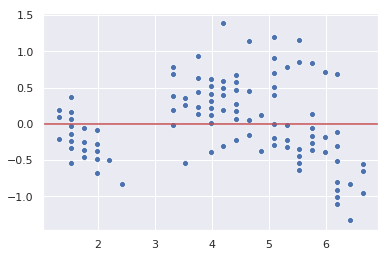

In [381]:
# Plot of residuals vs fitted values
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In this case, the variance seems to have a noticeable pattern, but it's not obvious what that may be.

We might then rely on a statistical test to consider this more formally. One such test is the **Breusch-Pagan** test which takes in the residuals and the predictor variables (convenient retrieved from our Statsmodels results as `results.model.exog`). This model is specifically intended for testing for heterscedasticity in a linear regression model. We run this below:

In [382]:
# Running the Breusch-Pagan test 
sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)

(23.412397406799318,
 1.307332881903719e-06,
 27.372623742164265,
 5.638087290329958e-07)

The results are the test statistics and p-values for two versions of the test- the Langrange Multiplier and F-test (in that order). In either case, the null hypothesis is that homoscedasticity is present, so a low p-value suggests heteroscedasticity and a violation of our assumption.

For this particular dataset, we might consider if the unequal variance is coming from some other variable (such as the species or some other factor) which is then "leaking" into our residuals here. In either case, we might want to re-evaluate the model.

### Multicollinearity <a name="regression_multicollinearity"></a>

The presence of collinearity (in the case of two variables) or multicollinearity (in the case of multiple variables) does not necessarily invaliate the basic assumption of our model, but its presence may create instability. That is, the current model migth have strong predictive power on the current dataset, but if we rebuilt the model on a similar dataset, even slight variations might result in wild changes of the regression coefficients.

To visualize this, imagine a model based on two predictor variable $X_1$ and $X_2$ with coefficients $\beta_1$ and $\beta_2$. If $X_1$ and $X_2$ posess collinearity, a fairly predictive model could be built where, in one build, $\beta_1$ is large and $\beta_2$ small, while in another build the reverse is true, since both coefficients "describe" the response variable to a similar degree. As such, your model, particularly your equation, is unstable, even though you might be able to accurate predict you response. Such a model would also be unstable for a different dataset with a higher empahsis on $X_2$ wherein the output might change quite drastically. In multicollinearity, the idea is similar, but the correlation may be spread across multiple variables.

Generally the OLS results summary will provide a warning of this, but there are a number of ways to check it:
* In the case of just two variables, check the correlation table. If two predictor variables are high correlated, you can expect some collinearity.
* In the case of multiple variables and checking for multicollinearity:
  * Check the eigen values of the correlation matrix. If any are close to 0, multicollinearity may exist.
  * Run a **variance inflation factor analysis (VIF)**. This reports the ratio of a beta within a given model compared to the beta if that model were alone. High values suggest collinearity on that variable. [This post](https://etav.github.io/python/vif_factor_python.html) demonstrates the technique.
  * Check the **condition number**. This number is conveniently printed in the regression summary results and indicates the sensitivity of response, or how much the output value of the function can change with versus a small change in input. While this does not measure collinearity directly, high condition numbers (rule of thumb, >30) suggest this may be a concern.
  
If collinearity is present, we might consider tactics such as reviewing the variables with collinearity and then removing one (or multiple) of them, or combining them in some way. We might also consider other techniques such as principal component analysis which will result in new, independent variable inputs.

### General Quality <a name="regression_quality"></a>

Beyond review the plot of our regression model, we might also consider a few items from the regression summary:
* **$R^2$** - This value indicates the proportion of the variance in the dataset explained by our model (so a high $R^2$ is good). Note that a high $R^2$ does *not* necessarily indicated our model is correct though, as it's possible for instance to have a non-linear relationship still with a high $R^2$.
* **$Adjusted \ R^2$** - One problem with $R^2$ is that adding additional terms to your model will almost always increase the $R^2$. However, this may lead to overfitting (fittin the noise in the data) and poor generalizability. The $Adjusted R^2$ reports the proprotion of variance explained but penalizes complexity. As such, this is intended to go up if a "worthwhile" predictor variable is added. This value can be particularly useful when comparing two models.
* **Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC)** - Both numbers are estimators of the relative statistical quality of a model, each referring in their own way to the relative amount of information lost by a model. As such, lower AIC and BIC values are preffered. In both cases, the criterion attempts to penalize models for added complexity, though the BIC criterion penalizes such more heavily. These are not particularly useful for reviewing a model on its own but can be helpful when comparing two different models though, importantly, *on the same data set*.

Again, it's always important to plot your results however!

### Outliers <a name="regression_outliers"></a>

One should also consider outliers in regression, though we won't discuss here (I may add more information later). Outliers might be found through the standard means, but one might consider reviewing a **Cook's distance plot** in the context of regression analysis.

### Addressing Regression Issues <a name="regression_addressing_issues"></a>

If any of the assumptions above are violated, or the model does not perform well, some of the techniques below may be helpful:
* Transforming the data. Perhaps the data possess a linear relationship under their log, root, squared, cubed or otherwise relationships. Both the predictor and response variables may be transformed, and Statsmodels allows implementation of this directly into the formulas.
* Adding or removing variables (of course)
* Adding interaction effects
* Combinding variables (namely in the case of collinearity)
* Basing a model on a principal component analysis instead
* Removing outliers or high-leverage points
* Considering a [different type of model](https://en.wikipedia.org/wiki/Linear_regression#Extensions), such as a "general linear" model or one that allows for more heteroscedasticity

One should not blindly implement such techniques (such as transformations) as should use the diagnostics above as a means of guided the methodology. For further reading, [this post](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0) and [this post](https://mgimond.github.io/Stats-in-R/regression.html) provide a rather significant walk-through of regression and debugging and might be considered

## Logistic Regression <a name="logistic_regression"></a>

Logistic regression can be used when the response variable's values are binary. Mechanically the process of fitting the a logistic regression using a formula in Statsmodels is similar, though logistic regression models on the **sigmoid function** rather than a typical linear equation.

The [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) is: $f(x) = \frac{e^x}{1+e^x}$
where the linear formula for fitting the logistic regression is $x$. This function's output is the probability (between 0 and 1) of the target case being modeled. As such, it appears as a "horizontal S" bounded between 0 and 1 on a graph. The sigmoid function can be transformed in such a way that the predictor side takes the standard linear form via a [logit](https://en.wikipedia.org/wiki/Logit) transformation. Logistic regression typicalls shows its coefficients under this transformation.

Errors work differently in logistic regression, so estimated parameters is usually done via the **maximum likelihood estimation**. In this method, the attempt is to create a curve that maximizes the probability of obtaining the 0's and 1's from the sample.

### Example and Interpretation <a name="logistic_example"></a>

We'll run a simple logistic regression below on our `Cat3` variable which had values of only "light" or "dark". When we set this up, we made this value a response to the sepal length variable, so we'll create our formula accordingly.

First though, we need to dummy code our binary variable into 1's and 0's. We'll make "light" be our "target" here (this is abritrary). Whereas Statsmodel's formula implementation handles categorical coding on the predictor side, it doesn't for the response, so this must be done manually.

In [0]:
# Dummy coding our binary variable into 1's and 0's
df['Cat3_light'] = df.Cat3.map(dict(light=1, dark=0))

We can now set up our logistic regression model on our coded variable. Mechanically this works the exact same as in linear regression.

In [384]:
logistic_model = sm.formula.logit(formula='Cat3_light ~ SepalLengthCm', data=df)
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.250573
         Iterations 8


However, before we print the summary results, we should note that the base `summary` method in Statsmodels logistic regression provides us with a little less information. It has a counterpart `summary2` that, while technically experimental, is stable and provides a bit more info.

We'll print both below and then do our interpretation off of the `summary2` method due to its extra info.

In [385]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:             Cat3_light   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                  0.6305
Time:                        14:03:21   Log-Likelihood:                -37.586
converged:                       True   LL-Null:                       -101.71
Covariance Type:            nonrobust   LLR p-value:                 9.932e-30
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -28.2871      4.854     -5.827      0.000     -37.801     -18.773
SepalLengthCm     5.0653      0.866      5.849      0.000       3.368       6.763


In [386]:
print(results.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.630     
Dependent Variable: Cat3_light       AIC:              79.1718   
Date:               2019-10-09 14:03 BIC:              85.1931   
No. Observations:   150              Log-Likelihood:   -37.586   
Df Model:           1                LL-Null:          -101.71   
Df Residuals:       148              LLR p-value:      9.9317e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      -28.2871   4.8544 -5.8271 0.0000 -37.8015 -18.7727
SepalLengthCm    5.0653   0.8660  5.8492 0.0000   3.3680   6.7626



Looking at the results, we can see that we get information much similar to that of ordinary linear regression. Let's break the interpration down into the differences compared to that of linear regression:
* **Interpretting coefficients** - As noted earlier, the summarized results are from the logit (i.e. the linear) version of our model, and any variable coefficient represents the log-odds, which makes the intercept and variable coefficients slightly hard to interpret. The sign of a coefficient for a given variable however is helpful in reading whether it increases (+) or decreases (-) the odds of finding our target. For further interpretation of the coefficients, we can exponentiate them, which we'll do below.
* **z and P>|Z| (Wald's Test)** - These are analagous to the t-test values for each coefficient in a linear regression, except that in the case of logistic regression, Wald's Test is instead performed. Wald's test here then calculates a z-statistic, but it is also based on the null hypothesis that the tested coefficient is 0 (and such is insignificant to the model). Low p-values then reject the null and suggest signifiance to the model (which we see here, as expected).
* **Pseudo R-squared** - This is as it sounds. Since residuals work in a different way for logistic regression, this is an attempted similar calculation to estimate the proportion of variance explained by the model.
* **LL... items** - These items relate to the "Likelihood ratio" test which is analogous to, and here replaces, the F-test. As with the overall F-test, this tests against the null hypothesis that all variable coefficients are 0 (there is no significant variable in our model). Again, low p-values indicated that at least one variable in the model is statistically significant.

As noted, further interpretation of the coefficients requires exponentiating them, so we'll do that below.

In [387]:
# Exponentiating the coefficients in our model
np.exp(results.params)

Intercept        5.189016e-13
SepalLengthCm    1.584265e+02
dtype: float64

Once exponentiated, we can now make the following interpretations: A) The intercept represents the value at which our function crosses the y-axis when x = 0. B) The variables coefficient represents the odds ratio (the ratio of the target occuring vs not). This affects the change in steepness of our "S" shape function. It also represents how many more times the target is likely to occur a unit increase in the given predictor variable.

One should note that we would also exponeniate the confidence interval values to get the corresponding confidence intervals outside of the log-odds form.

Just like linear regression, we should also be interested in plotting our function to test its validity. The `fittedvalues` attribute of our results however gives us the linear function results, so to get the sigmoidal prediction, we need to use the `predict` method to predict them directly.

We'll grab both below for comparison.

In [0]:
# Grabbing the sigmoidal predicted and linear predicted values for our model
predicted_vals = results.predict(df.SepalLengthCm)
predicted_linear_vals = results.fittedvalues

We can then plot an overlay of the 1's and 0's (representing "light" and "dark") with our model. We'll also overlay the linear function created for contrast.

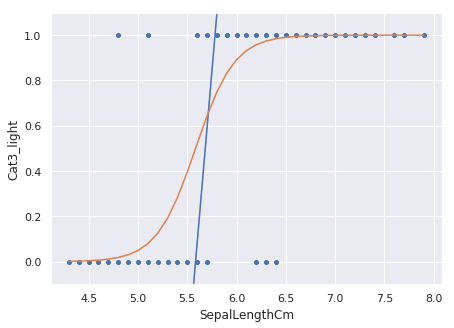

In [389]:
# Visualizing our model
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x="SepalLengthCm", y="Cat3_light", data=df, ax=ax)
sns.lineplot(x=df.SepalLengthCm, y=predicted_linear_vals, ax=ax)
sns.lineplot(x=df.SepalLengthCm, y=predicted_vals, ax=ax)
plt.ylim(-0.1,1.1)
plt.show()

As we can see, the model demonstrates the "horizontal S" bounded between 0 and 1. With increasing sepal length, the probability that the response variable is 1 (it's value is "light") increases, approaching 1.

We can also see that the linear model would not be useful to evaluate directly as it would, under the same interpretation, produced negative probabilities. We plot it here only for contrast.

The points not well contained by our model are due to the random noise added in the data creation step. Overall, the model appears useful for predicting our target.

### Logistic Diagnostics <a name="logistic_diagnostics"></a>

Residuals and their significance are slightly different in logistic regression and don't provide information in the same manner. Furthermore, as logistic regression functions as a classification method, it may be easier to evaluate it upon its predictive power (similar to machine learning models) rather than traditional statistical techniques. We will demonstrate some common diagnostics below.

#### Significance of Multiple Parameters <a name="log_mult_variables"></a>

Just like in multiple linear regression, we can use statistical tests to calculate the significance of the parameters in our model (that their coefficients equal 0):
* **Overall likelihood ratio test** - This is analogous to and replaces the overall F-test in multiple linear regression, testing against the null hypothesis that none of the parameters are significant. We have discusses this above as it is printed in the summary results.
* **General likelihood ratio test** - This tests the null hypothesis that a given subset of our predictor variables is 0. That is, it tests the null hypothesis that there is no significant difference between the model with and without that variable subset dropped. A high p-value would mean we have evidence supporting to drop that subset of variables. This is analgous to the "general linear F-test" in multiple linear regression, and in R can be computed using an ANOVA table the the test set as Chi-squared (this makes it equivalent to the likelihood ratio test). See the multiple linear regression example previously for demonstration as, unfortunately, Python does not currently have an easy implementation of this.
* **Individual significance tests** - In logistic regression this is Wald's Test which is analgous to and replaces the t-tests of multiple linear regression. This has been discussed earlier these are printed in the regression summary.

#### Linearity in the Logit Assumption <a name="log_linearity_LOESS"></a>

One testable assumption of logistic regression is the linearity of the function in the logit transformation. One way to test this is by the **LOESS** method ("locally estimated scatterplot smoothing"). This estimates the trend of the data by predicing each data point from the points nearby.

A logit scaling of the LOESS from a model that meets this assumption then is roughly linear. When plotted against the predictor variable, we can look for areas that lose the general trend to get a sense for which values of the predictor variable the model is "weak" against.

Python unfortunately does not have (to my knowledge) a LOESS implementation, but Statsmodels does have a LOWESS ("locally weighted scatterplot smoothing") implementation (`lowess`) which produces similar results (but can only work on one predictor variable). We have imported that directly. Scipy also has a convenient `logit` function which we have imported directly.

First let's run LOWESS on our model's predicted values against the predictor variable. This will return the LOWESS values and a sorted array of our predictor variable to match.

In [0]:
# Running LOWESS on our model and capturing the predictor and response
X, Y = lowess(predicted_vals, df.SepalLengthCm).T # We transpose the LOWESS output to store the arrays in X, Y format

Then we can plot the logit version of the LOWESS values on the y-axis against our predictor variable.

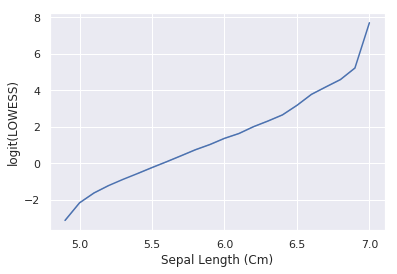

In [391]:
# Visualizing our LOWESS results
sns.lineplot(x=X, y=logit(Y))
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("logit(LOWESS)")
plt.show()

We can see that the data trend is roughly linear, though it warps at high and low values of the predictor variable. This may be due to having less data for such values. Overall the assumption is generally satisfied.

#### Goodness of Fit (Hosmer-Lemeshow) <a name="log_goodness_of_fit"></a>

One may also compute a statistical test on the "goodness of fit" of the model where the null hypothesis is that the model fits the data (the alternative is that it doesn't). One such test, is the **Hosmer-Lemeshow** test. However, there are reasons to be skeptical of the results of this test, and there is no current Python implementation in Scipy or Statsmodels (though there is in R), so we'll avoid further discussion here.

#### Confusion Matrices <a name="log_confusion_matrices"></a>

Another way to evaluate the model is to treat it like one would a machine learning classifer and print a **confusion matrix** which is a matrix of the false and true positive and negatives on the target.

Scikitlearn has a handy function for this, but we can actually call a similar version directly from Statsmodels using the `pred_table` method on our results. This calculates the confusion matrix at a given threshold of prediection.

For instance, a threshold of 0.5 means if our model's sigmoid function returned a value of 0.5 or higher, we consider our model to have classified it as a positive regarding our target. We'll call this below, arbitrarily deciding our threshold should be 0.5.

In [392]:
# Confusion matrix directly from Statsmodels logistic results
results.pred_table(threshold=0.5)

array([[57.,  5.],
       [ 2., 86.]])

The Statsmodels implementation returns the first of the possible classifications in the first column, so here that is "0" or negative (this may be different from the order of Scitkitlearn's and other confusion matrix implementations).

In either case, the "correct" predictions are on the diagonal, and here, our matrix reads as (first row) True Negative, False Positive, (second row) False Negative, True Positive. Overall, most of our predictions are on the diagonal, so our model has performed well.

#### ROC, AUC, and Cut Points <a name="log_roc_auc_cut"><a/>

When evaluating our model as a classification tool, we can borrow some methodologies often used in machine learning. Particarly we can evaluate the rates from our confusion matrix programmatically.

One way to do this is to plot an **ROC ("Receiver Operating Characteristic")** curve and then evaluate the **AUC (area under the [ROC] curve)**. The ROC curve can also help us in determining where to set a cut point (our threshold from earlier) in what value to use to classify our data from our model.

The ROC curve is a plot of the true positive rate against the false positive rate when classifying our model using all possible cut-points. Each cut-point (threshold value) for classification will have its own true positive and false positive rates, thus spitting out an array of pairs that can be plotted.

Scikitlearn has a handy function `roc_curve` to calculate the arrays of each rate as well as the matched threshold values for use. We feed the function the true values and the predicted probabilities of our model to utilize it.



In [0]:
# Calculating the values needed for an ROC curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(df.Cat3_light, predicted_vals)

With these calculated, we can then plot our ROC curve with the true positive rate on the y axis.

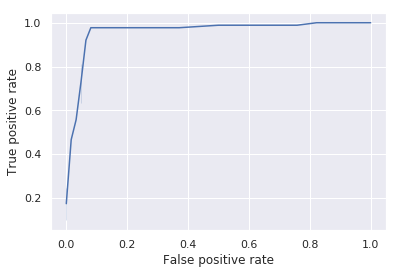

In [394]:
# Visualizing our ROC Curve
sns.lineplot(y=true_pos_rate, x=false_pos_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

We want our ROC curve to be positive and away from the y=x/diagonal line as possible (that is, far up and to the left). This would indicate that the ratio is in favor of true positives.

A way to judge this programmatically is to take the area under the ROC curve, which is commonly referred to as the AUC Score. Accordingly, we also want this to be high.

Scikitlearn also has an easy method for this which we use below, which takes the same inputs as the ROC curve function.

In [395]:
auc_score = roc_auc_score(df.Cat3_light, predicted_vals)
auc_score

0.9612353372434017

Our AUC score is quite high suggesting good strength in the model. A general rule of thumb for this score is that AUC > 0.7 is OK, AUC > 0.8 is good, and AUC > 0.9 is very very good.

We can also utilize the ROC curve results to attempt to programmatically determine a good cut-off/threshold value for our classification. One way to do this is to look at our arrays of true and false positives, find the index that matches the largest difference between the two (where the true positive rate is highest), and then lookup that threshold value in the array provided by the ROC curve function. We do this below.

In [396]:
# Find the index with the highest difference in true vs false positive rates
optimal_idx = np.argmax(true_pos_rate - false_pos_rate)
# And then lookup the corresponding threshold value
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5196318072513271

We can take this back to our confusion matrix technique used earlier to see how it performs.

In [397]:
results.pred_table(threshold=optimal_threshold)

array([[58.,  4.],
       [ 7., 81.]])

However, this is not always the best means. As we can see a threshold of 0.5 performed better overall.

In [398]:
results.pred_table(threshold=0.5)

array([[57.,  5.],
       [ 2., 86.]])

Ultimately the decision of which cut-off value to use, and how to find that using the ROC curve information, must be determined conditionally. For instance, you might be more concerned in true positives than true negatives and would adjust your calculations accordingly. There are a number of differen "paradigms" to calculate the "optimal" threshhold under, but as this is situational and lengthy, we'll end discussion here.